# COVID-19 and Vaccination

Görkem Deniz SEYHAN

I will use Data on COVID-19 Vaccination in The EU/EEA. This dataset represent which country using which vaccine and number of vaccinations per week. I will also use covid-19 data besides vaccine data. Death and case numbers are data that 
will be useful for me. I will make the analysis of the both datas respectively and compare each other.

## Vacine Analysis

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
data_vaccine = pd.read_csv('vaccine.csv')
data_vaccine

,YearWeekISO,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Region,Population,ReportingCountry,TargetGroup,Vaccine,Denominator
0,2020-W53,0,0.0,0,0,0.0,AT,8901064,AT,1_Age60+,JANSS,2259262.0
1,2020-W53,2656,0.0,0,0,61425.0,AT,8901064,AT,1_Age60+,COM,2259262.0
2,2020-W53,0,0.0,0,0,0.0,AT,8901064,AT,1_Age60+,MOD,2259262.0
3,2020-W53,0,0.0,0,0,0.0,AT,8901064,AT,1_Age60+,AZ,2259262.0
4,2020-W53,0,0.0,0,0,0.0,AT,8901064,AT,1_Age<60,AZ,5099181.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,2021-W16,23132,NaN,59038,0,73710.0,SK,5457873,SK,ALL,COM,4437897.0
30157,2021-W16,12149,NaN,7303,0,0.0,SK,5457873,SK,ALL,MOD,4437897.0
30158,2021-W17,5725,NaN,337,0,0.0,SK,5457873,SK,ALL,AZ,4437897.0
30159,2021-W17,7103,NaN,37773,0,0.0,SK,5457873,SK,ALL,COM,4437897.0


In [3]:
data_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearWeekISO          30161 non-null  object 
 1   FirstDose            30161 non-null  int64  
 2   FirstDoseRefused     15743 non-null  float64
 3   SecondDose           30161 non-null  int64  
 4   UnknownDose          30161 non-null  int64  
 5   NumberDosesReceived  7007 non-null   float64
 6   Region               30161 non-null  object 
 7   Population           30161 non-null  int64  
 8   ReportingCountry     30161 non-null  object 
 9   TargetGroup          30161 non-null  object 
 10  Vaccine              30161 non-null  object 
 11  Denominator          23289 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 2.8+ MB


In [4]:
data_vaccine.describe()

,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Population,Denominator
count,3.016100e+04,15743.000000,30161.000000,30161.000000,7.007000e+03,3.016100e+04,2.328900e+04
mean,8.887512e+03,2.886553,3428.610093,136.479659,3.386052e+04,2.772519e+07,1.978993e+06
std,4.651985e+04,41.155077,21837.089829,5273.380642,1.332147e+05,2.143698e+07,6.010757e+06
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,3.874700e+04,0.000000e+00
25%,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,5.525292e+06,1.447810e+05
50%,1.590000e+02,0.000000,0.000000,0.000000,0.000000e+00,3.795814e+07,4.085730e+05
75%,3.029000e+03,0.000000,349.000000,0.000000,5.850000e+03,3.795814e+07,1.330494e+06
max,2.264841e+06,1573.000000,852723.000000,427807.000000,2.738970e+06,8.316671e+07,6.948881e+07


.
   

My first question is which vaccine is more preferred?

   

.

Pfizer/BioNTech

count    7.000000e+00
mean     5.306665e+07
std      7.625627e+07
min      7.532740e+05
25%      2.523252e+06
50%      2.273913e+07
75%      6.461865e+07
max      2.136904e+08
dtype: float64

Vaccine
AZ         59257201
BECNBG      2635090
COM       213690365
JANSS        753274
MOD        22739126
SPU         2411415
UNK        69980097
dtype: int64


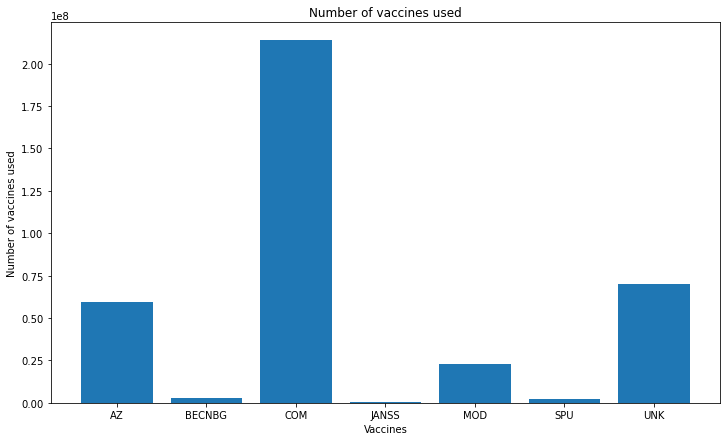

In [5]:
data_vaccine_firstdose=data_vaccine.groupby(["Vaccine"]).FirstDose.sum()
data_vaccine_seconddose=data_vaccine.groupby(["Vaccine"]).SecondDose.sum()
data_vaccine_total = data_vaccine_firstdose + data_vaccine_seconddose

plt.figure(figsize=(12, 7))
plt.bar(data_vaccine_total.index, data_vaccine_total.values)
plt.title("Number of vaccines used")
plt.xlabel("Vaccines")
plt.ylabel("Number of vaccines used")

print(data_vaccine_total.describe())
print()
print(data_vaccine_total)

.




COM = Comirnaty –
Pfizer/BioNTech

MOD = mRNA-1273 – Moderna

CN = BBIBV-CorV – CNBG

SIN = Coronavac – Sinovac

SPU = Sputnik V - Gamaleya
Research Institute

AZ = AZD1222 – AstraZeneca

UNK = UNKNOWN




.

.



Second question is which EU country has the most vaccinated population?



.

France

count    3.000000e+01
mean     1.238222e+07
std      1.989862e+07
min      1.142600e+04
25%      1.316474e+06
50%      4.854276e+06
75%      1.028772e+07
max      8.759837e+07
dtype: float64

ReportingCountry
AT     9522962
BE    12080122
BG     1641000
CY      530383
CZ     9728909
DE    25489567
DK     4442871
EE      908519
EL     9294415
ES    35495100
FI     6806440
FR    87598366
HR     1700149
HU    11917404
IE     3583269
IS      271620
IT    55639648
LI       11426
LT     2744849
LU      388336
LV      508218
MT      643968
NL     5265680
NO     3139321
PL    49016080
PT     9856364
RO    10371206
SE    10037282
SI     1216402
SK     1616692
dtype: int64


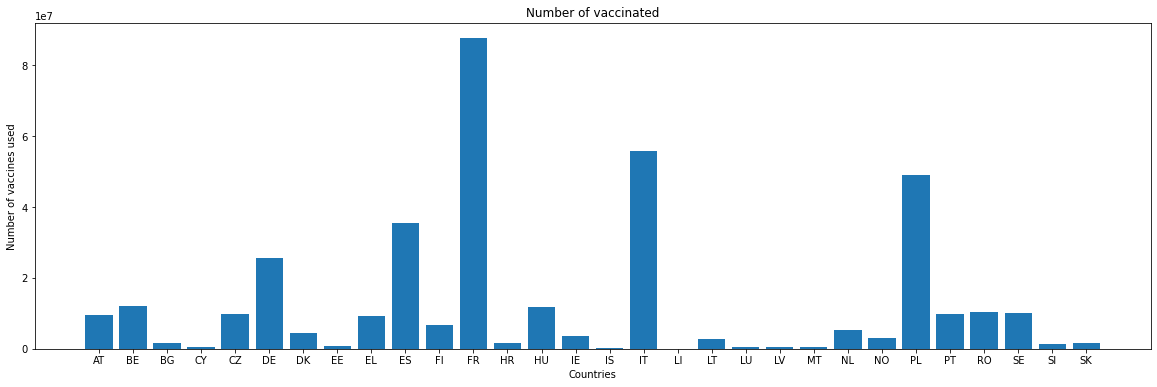

In [6]:
data_vaccine_region1 = data_vaccine.groupby(["ReportingCountry"]).FirstDose.sum()
data_vaccine_region2 = data_vaccine.groupby(["ReportingCountry"]).SecondDose.sum()
data_vaccine_region3 = data_vaccine_region1 + data_vaccine_region2

plt.figure(figsize=(20, 6))
plt.bar(data_vaccine_region3.index, data_vaccine_region3.values)
plt.title("Number of vaccinated")
plt.xlabel("Countries")
plt.ylabel("Number of vaccines used")

print(data_vaccine_region3.describe())
print()
print(data_vaccine_region3)

.


Country names = ISO 3166-1-alpha-2 two-letter code


.

## Corona Dataset Analysis

In [7]:
data_corona = pd.read_csv('worldometer_coronavirus_summary_data.csv')
data_corona

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,61755,2683.0,54019,5053,1124.0,1557,68.0,417283.0,10520.0,39667381
1,Albania,Europe,131577,2408.0,115253,13916,18.0,45764,838.0,650005.0,226079.0,2875127
2,Algeria,Africa,123692,3315.0,86149,34228,28.0,2778,74.0,230861.0,5186.0,44519649
3,Andorra,Europe,13390,127.0,12936,327,12.0,173064,1641.0,193595.0,2502197.0,77370
4,Angola,Africa,28201,628.0,24698,2875,35.0,836,19.0,513297.0,15220.0,33725272
...,...,...,...,...,...,...,...,...,...,...,...,...
215,Wallis And Futuna Islands,Australia/Oceania,445,7.0,44,394,1.0,40195,632.0,17264.0,1559389.0,11071
216,Western Sahara,Africa,10,1.0,8,1,NaN,16,2.0,NaN,NaN,609709
217,Yemen,Asia,6446,1269.0,2978,2199,23.0,212,42.0,31386.0,1033.0,30379807
218,Zambia,Africa,92004,1256.0,90316,432,36.0,4889,67.0,1431929.0,76097.0,18817059


In [8]:
data_corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         220 non-null    object 
 1   continent                       220 non-null    object 
 2   total_confirmed                 220 non-null    int64  
 3   total_deaths                    205 non-null    float64
 4   total_recovered                 220 non-null    int64  
 5   active_cases                    220 non-null    int64  
 6   serious_or_critical             150 non-null    float64
 7   total_cases_per_1m_population   220 non-null    int64  
 8   total_deaths_per_1m_population  201 non-null    float64
 9   total_tests                     210 non-null    float64
 10  total_tests_per_1m_population   210 non-null    float64
 11  population                      220 non-null    int64  
dtypes: float64(5), int64(5), object(2)
m

In [9]:
data_corona.describe()

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
count,2.200000e+02,205.000000,2.200000e+02,2.200000e+02,150.000000,220.000000,201.000000,2.100000e+02,2.100000e+02,2.200000e+02
mean,7.161842e+05,16021.434146,6.175508e+05,8.370440e+04,722.626667,31743.127273,575.263682,1.070864e+07,6.405943e+05,3.556045e+07
std,2.968715e+06,58301.465288,2.430000e+06,5.125047e+05,1668.261425,36225.992495,706.178140,4.232859e+07,1.067685e+06,1.400519e+08
min,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,1.000000,8.000000,1.000000,1.313000e+03,1.033000e+03,8.030000e+02
25%,5.015750e+03,114.000000,3.928750e+03,1.882500e+02,14.000000,1834.250000,43.000000,1.245832e+05,5.659850e+04,6.329708e+05
50%,4.312000e+04,801.000000,3.755100e+04,3.342000e+03,84.000000,15853.000000,270.000000,9.535520e+05,2.561720e+05,6.564548e+06
75%,3.152015e+05,6375.000000,2.765950e+05,2.517125e+04,514.750000,59402.000000,912.000000,5.039764e+06,7.296362e+05,2.412539e+07
max,3.341883e+07,594911.000000,2.632476e+07,6.499158e+06,9140.000000,173064.000000,2947.000000,4.559898e+08,7.139009e+06,1.439324e+09


.


I created a new column name called corona population


.

In [10]:
data_corona["corona_population"] = data_corona["total_confirmed"] / data_corona["population"]
data_corona[data_corona["continent"]=="Europe"]

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,corona_population
1,Albania,Europe,131577,2408.0,115253,13916,18.0,45764,838.0,650005.0,226079.0,2875127,0.045764
3,Andorra,Europe,13390,127.0,12936,327,12.0,173064,1641.0,193595.0,2502197.0,77370,0.173064
11,Austria,Europe,628817,10351.0,599854,18612,417.0,69483,1144.0,33990188.0,3755832.0,9049975,0.069483
17,Belarus,Europe,366305,2612.0,356842,6851,NaN,38776,276.0,5958089.0,630707.0,9446682,0.038776
18,Belgium,Europe,1010987,24483.0,880229,106275,744.0,86911,2105.0,12885085.0,1107688.0,11632413,0.086911
24,Bosnia And Herzegovina,Europe,200693,8790.0,164717,27186,NaN,61497,2693.0,922568.0,282697.0,3263454,0.061497
29,Bulgaria,Europe,409495,16886.0,347870,44739,570.0,59313,2446.0,2577231.0,373300.0,6903920,0.059313
40,Channel Islands,Europe,4056,86.0,3956,14,NaN,23148,491.0,454413.0,2593385.0,175220,0.023148
50,Croatia,Europe,342487,7388.0,323834,11265,242.0,83866,1809.0,1863305.0,456276.0,4083725,0.083866
54,Czech Republic,Europe,1642696,29608.0,1570842,42246,411.0,153153,2760.0,19585985.0,1826055.0,10725848,0.153153


.



Which EU country has the highest covid-19 population?




.

Andorra

Text(0, 0.5, 'Corona population')

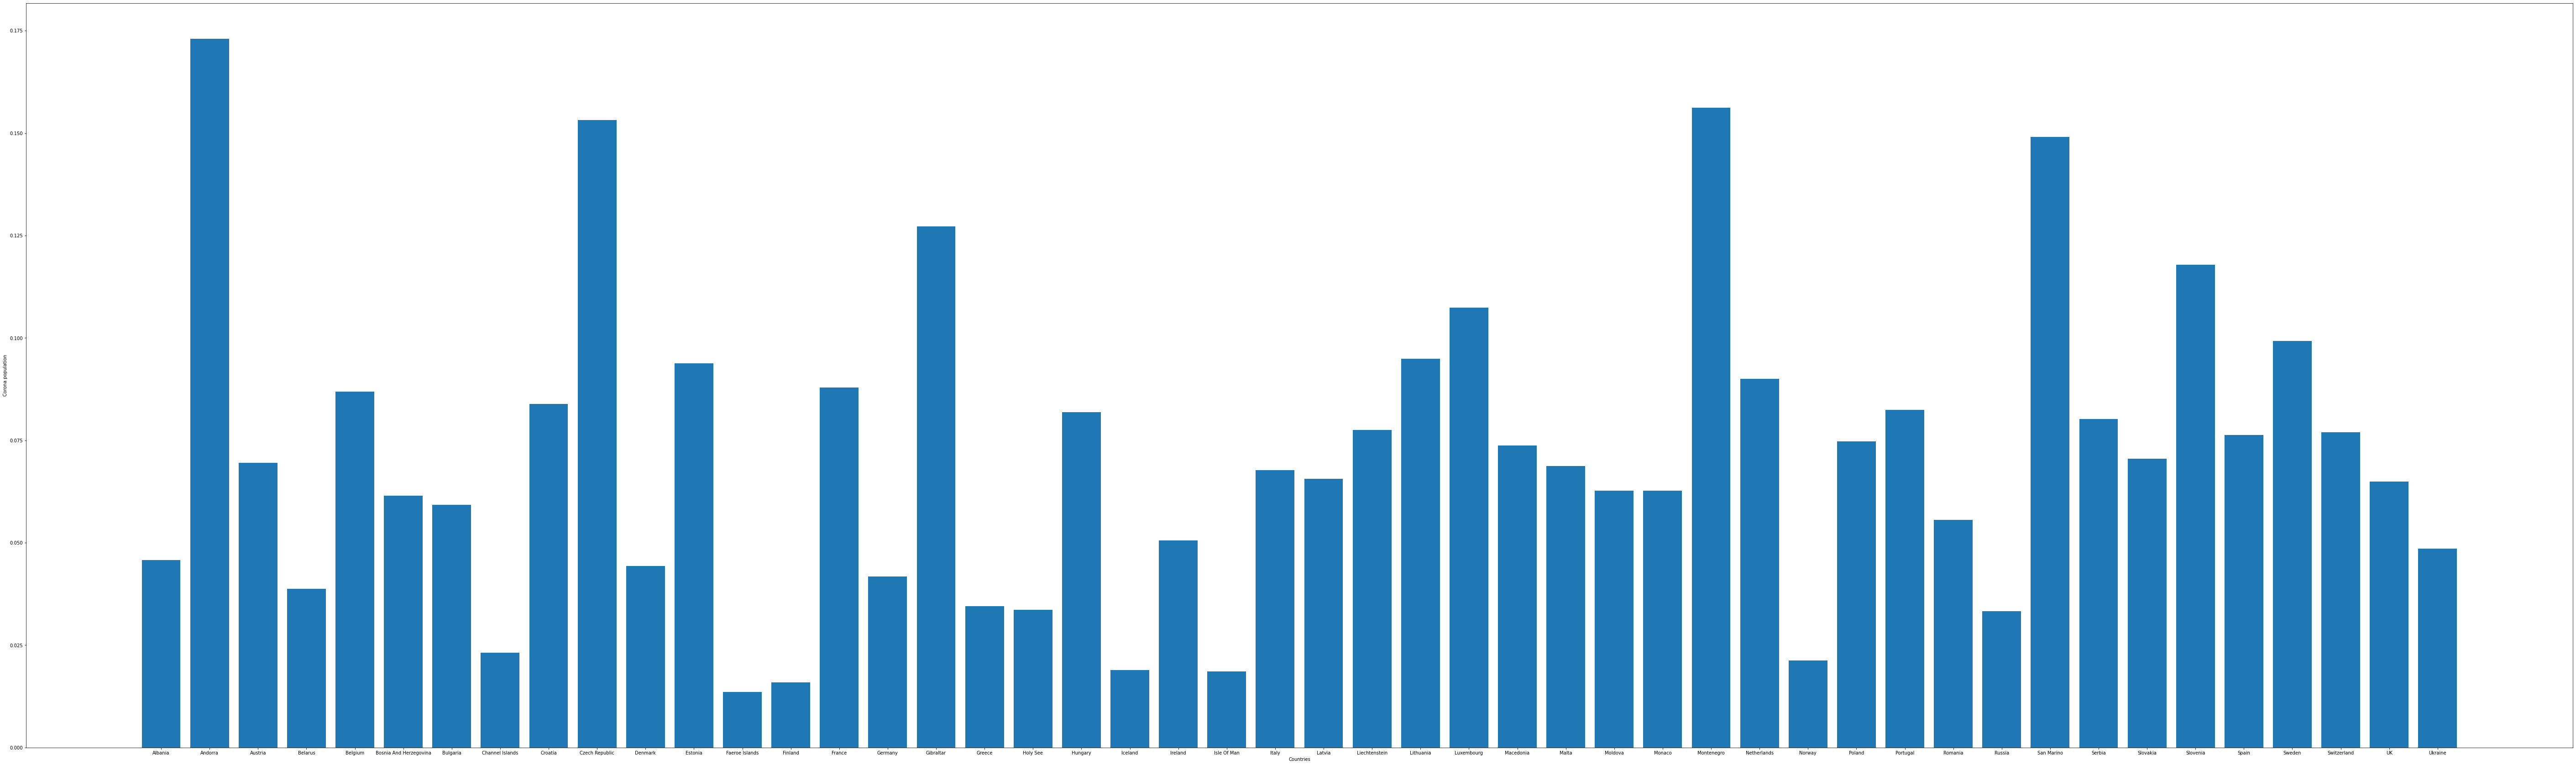

In [11]:
plt.figure(figsize=(100, 30))
plt.bar(data_corona[data_corona["continent"]=="Europe"].country.values, data_corona[data_corona["continent"]=="Europe"].corona_population.values)
plt.xlabel("Countries")
plt.ylabel("Corona population")

.



I created a new column name called case_over_death




.

In [12]:
data_corona["case_over_death"] = data_corona["total_confirmed"] / data_corona["total_deaths"]
data_corona[data_corona["continent"]=="Europe"]

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,corona_population,case_over_death
1,Albania,Europe,131577,2408.0,115253,13916,18.0,45764,838.0,650005.0,226079.0,2875127,0.045764,54.641611
3,Andorra,Europe,13390,127.0,12936,327,12.0,173064,1641.0,193595.0,2502197.0,77370,0.173064,105.433071
11,Austria,Europe,628817,10351.0,599854,18612,417.0,69483,1144.0,33990188.0,3755832.0,9049975,0.069483,60.749396
17,Belarus,Europe,366305,2612.0,356842,6851,NaN,38776,276.0,5958089.0,630707.0,9446682,0.038776,140.239280
18,Belgium,Europe,1010987,24483.0,880229,106275,744.0,86911,2105.0,12885085.0,1107688.0,11632413,0.086911,41.293428
24,Bosnia And Herzegovina,Europe,200693,8790.0,164717,27186,NaN,61497,2693.0,922568.0,282697.0,3263454,0.061497,22.831968
29,Bulgaria,Europe,409495,16886.0,347870,44739,570.0,59313,2446.0,2577231.0,373300.0,6903920,0.059313,24.250563
40,Channel Islands,Europe,4056,86.0,3956,14,NaN,23148,491.0,454413.0,2593385.0,175220,0.023148,47.162791
50,Croatia,Europe,342487,7388.0,323834,11265,242.0,83866,1809.0,1863305.0,456276.0,4083725,0.083866,46.357201
54,Czech Republic,Europe,1642696,29608.0,1570842,42246,411.0,153153,2760.0,19585985.0,1826055.0,10725848,0.153153,55.481491


.




Which EU country has the lowest case / death rate?




.

Bosnia and Herzegovina

Text(0, 0.5, 'Case over death')

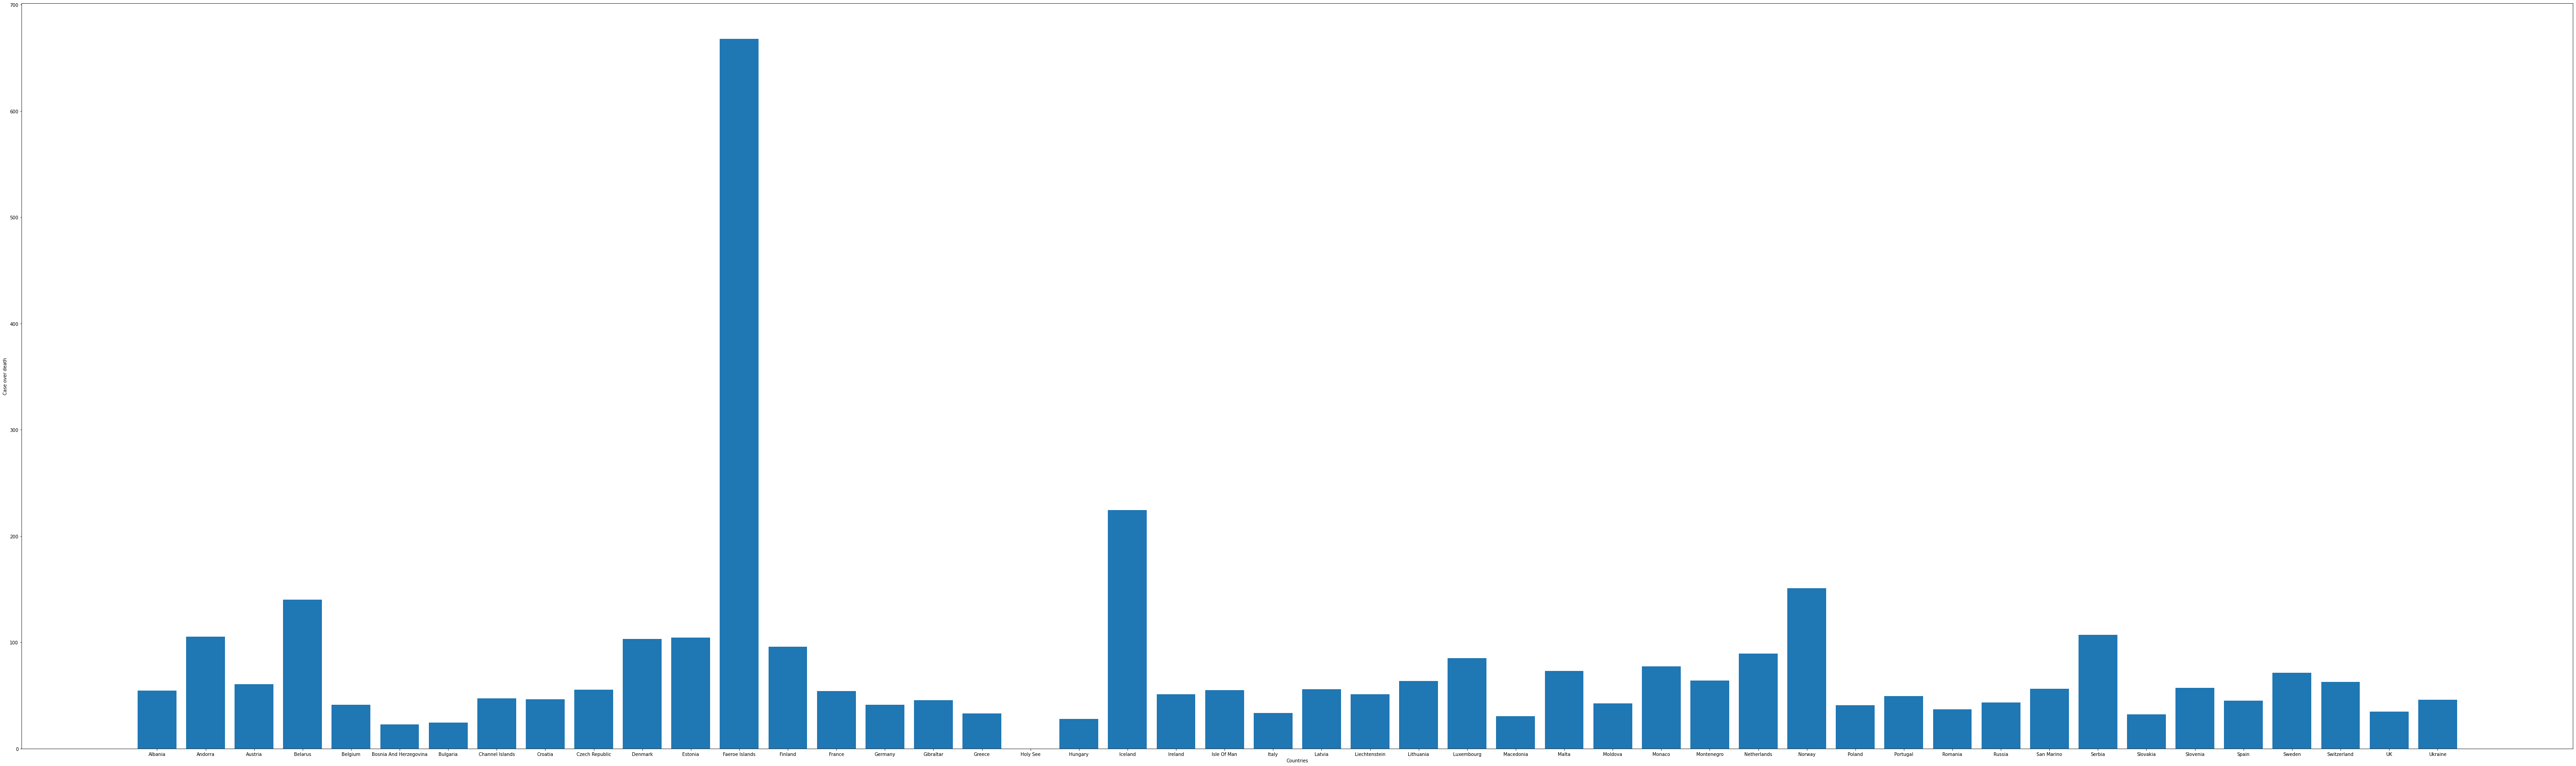

In [13]:
plt.figure(figsize=(100, 30))
plt.bar(data_corona[data_corona["continent"]=="Europe"].country.values, data_corona[data_corona["continent"]=="Europe"].case_over_death.values)
plt.xlabel("Countries")
plt.ylabel("Case over death")

In [14]:
data_corr1 = data_corona[data_corona["continent"]=="Europe"]
data_corr2 = data_corr1[['total_confirmed','total_deaths','total_cases_per_1m_population','total_deaths_per_1m_population']].corr()
data_corr2

,total_confirmed,total_deaths,total_cases_per_1m_population,total_deaths_per_1m_population
total_confirmed,1.000000,0.973230,-0.029697,0.117939
total_deaths,0.973230,1.000000,-0.077172,0.169250
total_cases_per_1m_population,-0.029697,-0.077172,1.000000,0.685780
total_deaths_per_1m_population,0.117939,0.169250,0.685780,1.000000


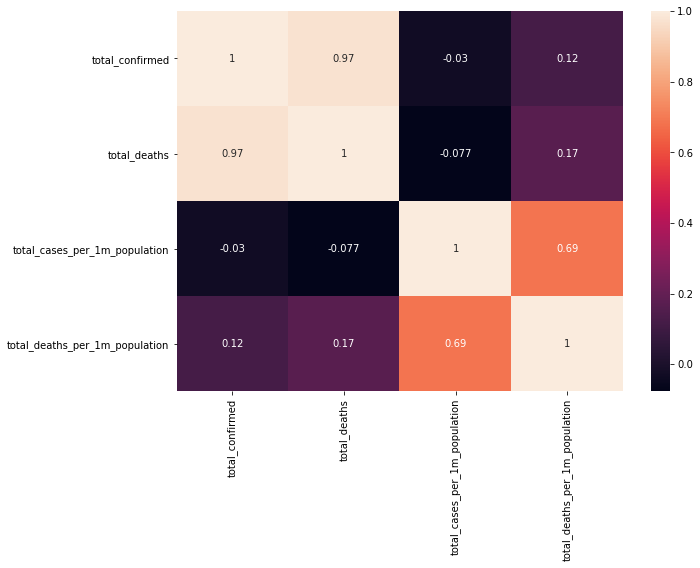

In [15]:
plt.figure(figsize = (10,7))
sns.heatmap(data_corr2, annot = True)
plt.show()

## Hypothesis

.

As vaccination increases, the number of deaths decreases.





.

In [16]:
data_weekly = pd.read_csv('json.csv')
data_weekly_deaths = data_weekly[data_weekly["indicator"]=="deaths"]
data_weekly_deaths2 = data_weekly_deaths[(data_weekly_deaths["year_week"]>"2020-52") & (data_weekly_deaths["year_week"]<"2021-18")]
data_weekly_deaths4 = data_weekly_deaths2[
(data_weekly_deaths2["country"]=="Austria")
|(data_weekly_deaths2["country"]=="Belgium")
|(data_weekly_deaths2["country"]=="Bulgaria")
|(data_weekly_deaths2["country"]=="Cyprus")
|(data_weekly_deaths2["country"]=="Czechia")
|(data_weekly_deaths2["country"]=="Germany")
|(data_weekly_deaths2["country"]=="Denmark")
|(data_weekly_deaths2["country"]=="Estonia")
|(data_weekly_deaths2["country"]=="Greece")
|(data_weekly_deaths2["country"]=="Spain")
|(data_weekly_deaths2["country"]=="Finland")
|(data_weekly_deaths2["country"]=="France")
|(data_weekly_deaths2["country"]=="Croatia")
|(data_weekly_deaths2["country"]=="Hungary")
|(data_weekly_deaths2["country"]=="Ireland")
|(data_weekly_deaths2["country"]=="Iceland")
|(data_weekly_deaths2["country"]=="Italy")
|(data_weekly_deaths2["country"]=="Liechtenstein")
|(data_weekly_deaths2["country"]=="Lithuania")
|(data_weekly_deaths2["country"]=="Luxembourg")
|(data_weekly_deaths2["country"]=="Latvia")
|(data_weekly_deaths2["country"]=="Malta")
|(data_weekly_deaths2["country"]=="Netherlands")
|(data_weekly_deaths2["country"]=="Norway")
|(data_weekly_deaths2["country"]=="Poland")
|(data_weekly_deaths2["country"]=="Portugal")
|(data_weekly_deaths2["country"]=="Romania")
|(data_weekly_deaths2["country"]=="Sweden")
|(data_weekly_deaths2["country"]=="Slovenia")
|(data_weekly_deaths2["country"]=="Slovakia")]
data_weekly_deaths4

,country,country_code,continent,population,indicator,weekly_count,year_week,cumulative_count,source,rate_14_day
1992,Austria,AUT,Europe,8901064.0,deaths,381,2020-53,6253,"Epidemic intelligence, national weekly data",116.502926
1993,Austria,AUT,Europe,8901064.0,deaths,378,2021-01,6631,"Epidemic intelligence, national weekly data",85.270705
1994,Austria,AUT,Europe,8901064.0,deaths,383,2021-02,7014,"Epidemic intelligence, national weekly data",85.495397
1995,Austria,AUT,Europe,8901064.0,deaths,348,2021-03,7362,"Epidemic intelligence, national weekly data",82.125013
1996,Austria,AUT,Europe,8901064.0,deaths,291,2021-04,7653,"Epidemic intelligence, national weekly data",71.789170
...,...,...,...,...,...,...,...,...,...,...
24717,Sweden,SWE,Europe,10327589.0,deaths,141,2021-13,13715,"Epidemic intelligence, national weekly data",25.756253
24718,Sweden,SWE,Europe,10327589.0,deaths,129,2021-14,13844,"Epidemic intelligence, national weekly data",26.143566
24719,Sweden,SWE,Europe,10327589.0,deaths,139,2021-15,13983,"Epidemic intelligence, national weekly data",25.949910
24720,Sweden,SWE,Europe,10327589.0,deaths,130,2021-16,14113,"Epidemic intelligence, national weekly data",26.046738


In [17]:
data_weekly_deaths4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 1992 to 24721
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           540 non-null    object 
 1   country_code      540 non-null    object 
 2   continent         540 non-null    object 
 3   population        540 non-null    float64
 4   indicator         540 non-null    object 
 5   weekly_count      540 non-null    int64  
 6   year_week         540 non-null    object 
 7   cumulative_count  540 non-null    int64  
 8   source            540 non-null    object 
 9   rate_14_day       540 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 46.4+ KB


In [18]:
data_weekly_deaths4.describe()

,population,weekly_count,cumulative_count,rate_14_day
count,5.400000e+02,540.000000,540.000000,540.000000
mean,1.510301e+07,619.759259,18288.148148,81.192634
std,2.123415e+07,957.254714,27059.322584,74.787980
min,3.874700e+04,0.000000,29.000000,0.000000
25%,2.095861e+06,29.000000,848.250000,30.313098
50%,6.387122e+06,186.500000,6831.500000,60.680138
75%,1.152244e+07,685.750000,19551.500000,107.652104
max,8.316671e+07,6112.000000,121177.000000,567.785893


In [19]:
data_weekly_deaths4.groupby("country").weekly_count.sum()

country
Austria           4117
Belgium           4910
Bulgaria          9328
Croatia           3479
Cyprus             202
Czechia          18213
Denmark           1286
Estonia            959
Finland            369
France           41739
Germany          53150
Greece            5781
Hungary          18747
Iceland              1
Ireland           2702
Italy            49252
Latvia            1585
Liechtenstein       30
Lithuania         2687
Luxembourg         310
Malta              205
Netherlands       6140
Norway             328
Poland           40958
Portugal         10300
Romania          13046
Slovakia          9928
Slovenia          1985
Spain            28171
Sweden            4762
Name: weekly_count, dtype: int64

# Germany

I'm looking for Germany    
Hypo: As vaccination increases, the number of deaths decreases.

In [20]:
data_vaccine_de = data_vaccine[data_vaccine["ReportingCountry"]=="DE"]
data_vaccine_de

,YearWeekISO,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Region,Population,ReportingCountry,TargetGroup,Vaccine,Denominator
2421,2020-W52,24492,NaN,11,0,151125.0,DE,83166711,DE,ALL,COM,69488809.0
2422,2020-W53,275874,NaN,1010,0,1174875.0,DE,83166711,DE,ALL,COM,69488809.0
2423,2021-W01,380905,NaN,402,0,687375.0,DE,83166711,DE,ALL,COM,69488809.0
2424,2021-W02,509578,NaN,19114,0,0.0,DE,83166711,DE,ALL,COM,69488809.0
2425,2021-W02,13895,NaN,44,0,63600.0,DE,83166711,DE,ALL,MOD,69488809.0
2426,2021-W03,411753,NaN,245559,0,842400.0,DE,83166711,DE,ALL,COM,69488809.0
2427,2021-W03,15636,NaN,2,0,0.0,DE,83166711,DE,ALL,MOD,69488809.0
2428,2021-W04,9552,NaN,40,0,90000.0,DE,83166711,DE,ALL,MOD,69488809.0
2429,2021-W04,309470,NaN,334155,0,489060.0,DE,83166711,DE,ALL,COM,69488809.0
2430,2021-W05,363445,NaN,452170,0,747630.0,DE,83166711,DE,ALL,COM,69488809.0


In [21]:
data_vaccine_de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 2421 to 2464
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearWeekISO          44 non-null     object 
 1   FirstDose            44 non-null     int64  
 2   FirstDoseRefused     0 non-null      float64
 3   SecondDose           44 non-null     int64  
 4   UnknownDose          44 non-null     int64  
 5   NumberDosesReceived  44 non-null     float64
 6   Region               44 non-null     object 
 7   Population           44 non-null     int64  
 8   ReportingCountry     44 non-null     object 
 9   TargetGroup          44 non-null     object 
 10  Vaccine              44 non-null     object 
 11  Denominator          44 non-null     float64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.5+ KB


In [22]:
data_vaccine_de.describe()

,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Population,Denominator
count,4.400000e+01,0.0,44.000000,44.0,4.400000e+01,44.0,44.0
mean,4.436635e+05,NaN,135644.818182,0.0,6.737547e+05,83166711.0,69488809.0
std,5.097976e+05,NaN,186826.782661,0.0,6.906778e+05,0.0,0.0
min,9.552000e+03,NaN,2.000000,0.0,0.000000e+00,83166711.0,69488809.0
25%,7.283400e+04,NaN,371.500000,0.0,8.340000e+04,83166711.0,69488809.0
50%,3.364575e+05,NaN,20123.500000,0.0,6.504000e+05,83166711.0,69488809.0
75%,5.885955e+05,NaN,336872.500000,0.0,9.349800e+05,83166711.0,69488809.0
max,2.264841e+06,NaN,521679.000000,0.0,2.738970e+06,83166711.0,69488809.0


In [23]:
data_vaccine_de1 = data_vaccine_de[(data_vaccine_de["YearWeekISO"]>"2020-W52") & (data_vaccine_de["YearWeekISO"]<"2021-W18")]
data_vaccine_de2 = data_vaccine_de1.groupby("YearWeekISO").FirstDose.sum() + data_vaccine_de1.groupby("YearWeekISO").SecondDose.sum()
data_vaccine_de2

YearWeekISO
2020-W53     276884
2021-W01     381307
2021-W02     542631
2021-W03     672950
2021-W04     653217
2021-W05     844174
2021-W06     866107
2021-W07     909284
2021-W08    1157900
2021-W09    1522234
2021-W10    1792840
2021-W11    1457931
2021-W12    2084995
2021-W13    1949160
2021-W14    3280602
2021-W15    3643083
2021-W16    3429765
dtype: int64

In [24]:
data_de = data_weekly_deaths4[data_weekly_deaths4["country"]=="Germany"]
data_de

,country,country_code,continent,population,indicator,weekly_count,year_week,cumulative_count,source,rate_14_day
10420,Germany,DEU,Europe,83166711.0,deaths,4448,2020-53,34574,"Epidemic intelligence, national weekly data",99.787522
10421,Germany,DEU,Europe,83166711.0,deaths,6112,2021-01,40686,"Epidemic intelligence, national weekly data",126.973880
10422,Germany,DEU,Europe,83166711.0,deaths,5947,2021-02,46633,"Epidemic intelligence, national weekly data",144.997919
10423,Germany,DEU,Europe,83166711.0,deaths,5454,2021-03,52087,"Epidemic intelligence, national weekly data",137.086099
10424,Germany,DEU,Europe,83166711.0,deaths,5033,2021-04,57120,"Epidemic intelligence, national weekly data",126.096125
10425,Germany,DEU,Europe,83166711.0,deaths,4555,2021-05,61675,"Epidemic intelligence, national weekly data",115.286512
10426,Germany,DEU,Europe,83166711.0,deaths,3401,2021-06,65076,"Epidemic intelligence, national weekly data",95.663276
10427,Germany,DEU,Europe,83166711.0,deaths,2827,2021-07,67903,"Epidemic intelligence, national weekly data",74.885732
10428,Germany,DEU,Europe,83166711.0,deaths,2202,2021-08,70105,"Epidemic intelligence, national weekly data",60.468906
10429,Germany,DEU,Europe,83166711.0,deaths,1829,2021-09,71934,"Epidemic intelligence, national weekly data",48.468912


Text(0, 0.5, 'Number of deaths')

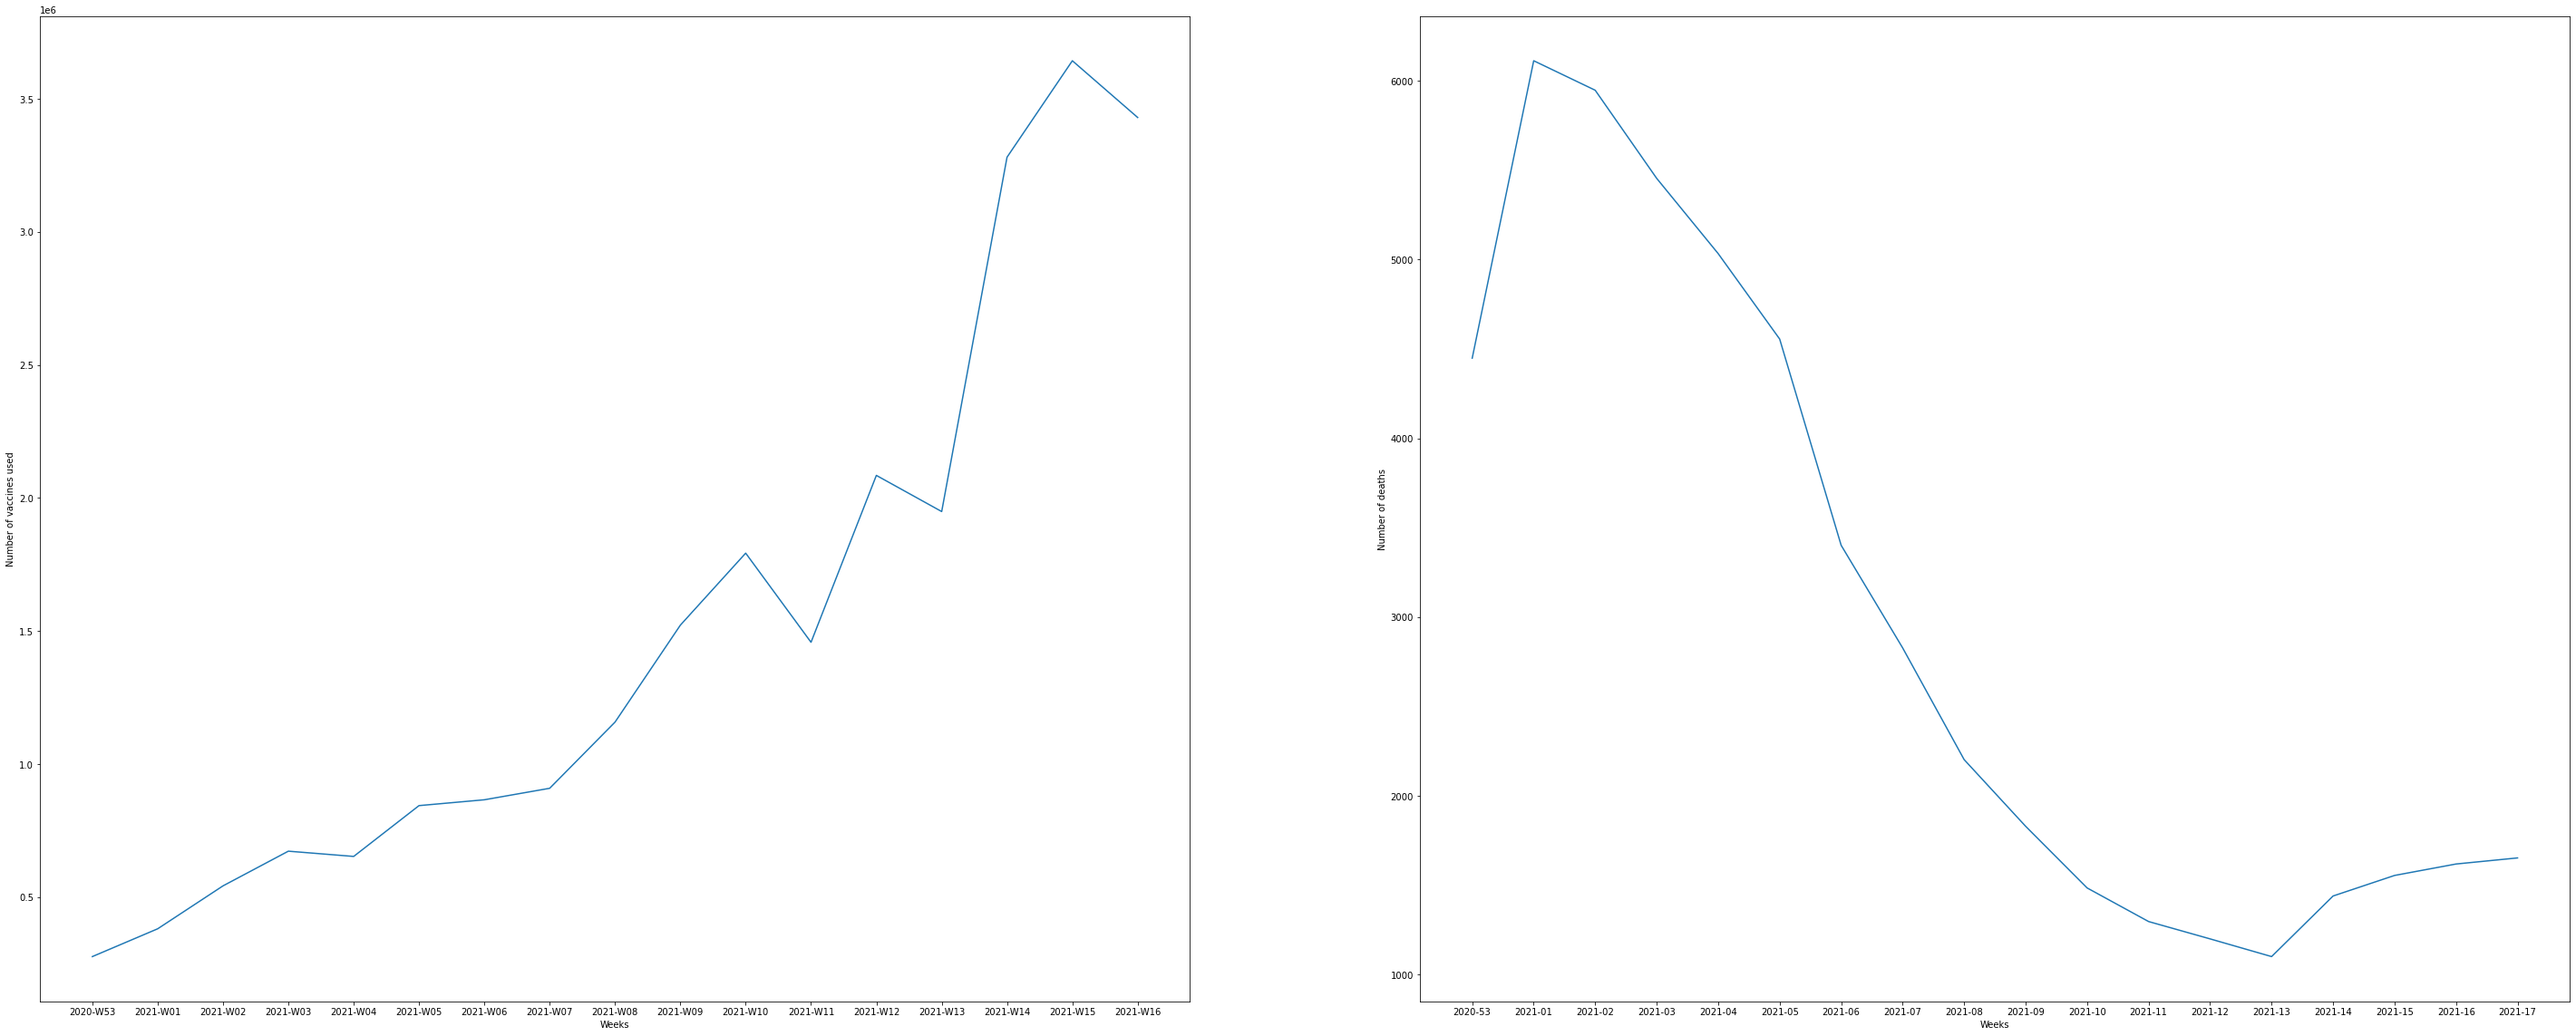

In [25]:
plt.figure(figsize=(50, 20))
plt.subplot(1, 2, 1)
plt.plot(data_vaccine_de2.index, data_vaccine_de2.values)
plt.xlabel("Weeks")
plt.ylabel("Number of vaccines used")
plt.subplot(1, 2, 2)
plt.plot(data_de.year_week.values, data_de.weekly_count.values)
plt.xlabel("Weeks")
plt.ylabel("Number of deaths")

.


The amount of use of weekly vaccines


.

First Dose

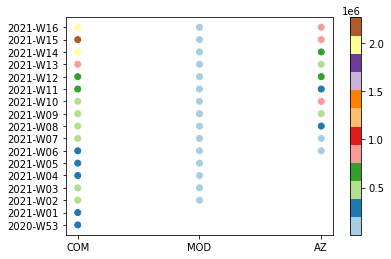

In [26]:
colors = data_vaccine_de1.FirstDose
plt.scatter(data_vaccine_de1.Vaccine, data_vaccine_de1.YearWeekISO , c=colors, cmap='Paired')
plt.colorbar()
plt.show()

Second Dose

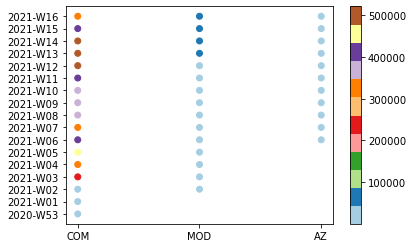

In [27]:
colors = data_vaccine_de1.SecondDose
plt.scatter(data_vaccine_de1.Vaccine, data_vaccine_de1.YearWeekISO , c=colors, cmap='Paired')
plt.colorbar()
plt.show()

In [28]:
data_new_DE = pd.DataFrame()
data_new_DE["NumOfDeaths"] = data_de[data_de["year_week"]<"2021-17"].weekly_count.values
data_new_DE["NumOfVaccinated"] = data_vaccine_de2.values
data_new_DE

,NumOfDeaths,NumOfVaccinated
0,4448,276884
1,6112,381307
2,5947,542631
3,5454,672950
4,5033,653217
5,4555,844174
6,3401,866107
7,2827,909284
8,2202,1157900
9,1829,1522234


In [29]:
data_new_DE.describe()

,NumOfDeaths,NumOfVaccinated
count,17.000000,1.700000e+01
mean,3029.294118,1.497945e+06
std,1832.288656,1.074775e+06
min,1100.000000,2.768840e+05
25%,1484.000000,6.729500e+05
50%,2202.000000,1.157900e+06
75%,4555.000000,1.949160e+06
max,6112.000000,3.643083e+06


In [30]:
data_new_DE.corr()

,NumOfDeaths,NumOfVaccinated
NumOfDeaths,1.000000,-0.748151
NumOfVaccinated,-0.748151,1.000000


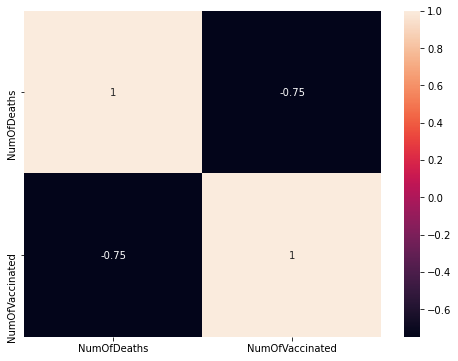

In [31]:
plt.figure(figsize = (8,6))
sns.heatmap(data_new_DE.corr(), annot = True)
plt.show()

The number of deaths decreases as the number of vaccinated people increases

In [32]:
print(stats.ttest_ind(data_new_DE.NumOfVaccinated.values, data_new_DE.NumOfDeaths.values, equal_var=True))

Ttest_indResult(statistic=5.734862937972806, pvalue=2.341781809705912e-06)


In [33]:
stats.shapiro(data_new_DE)

ShapiroResult(statistic=0.7389166355133057, pvalue=2.0603783923434094e-06)

# France

In [34]:
data_vaccine_fr = data_vaccine[data_vaccine["ReportingCountry"]=="FR"]
data_vaccine_fr

,YearWeekISO,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Region,Population,ReportingCountry,TargetGroup,Vaccine,Denominator
8051,2020-W52,0,NaN,0,0,NaN,FRY4,67320216,FR,ALL,UNK,625167.0
8052,2020-W52,0,NaN,0,0,NaN,FRY5,67320216,FR,ALL,UNK,137751.0
8053,2020-W52,0,NaN,0,0,NaN,UNK,67320216,FR,ALL,UNK,NaN
8054,2020-W52,0,NaN,0,0,NaN,FRG,67320216,FR,ALL,UNK,NaN
8055,2020-W52,0,NaN,0,0,NaN,FRH,67320216,FR,ALL,UNK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10821,2021-W17,283,NaN,233,0,NaN,FRY4,67320216,FR,Age80+,UNK,24374.0
10822,2021-W17,6,NaN,6,0,NaN,FRY5,67320216,FR,Age80+,UNK,1267.0
10823,2021-W17,231,NaN,86,0,NaN,FR,67320216,FR,AgeUNK,UNK,NaN
10824,2021-W17,43807,NaN,58834,0,NaN,FR,67320216,FR,HCW,UNK,2223286.0


In [35]:
data_vaccine_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2775 entries, 8051 to 10825
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearWeekISO          2775 non-null   object 
 1   FirstDose            2775 non-null   int64  
 2   FirstDoseRefused     0 non-null      float64
 3   SecondDose           2775 non-null   int64  
 4   UnknownDose          2775 non-null   int64  
 5   NumberDosesReceived  2204 non-null   float64
 6   Region               2775 non-null   object 
 7   Population           2775 non-null   int64  
 8   ReportingCountry     2775 non-null   object 
 9   TargetGroup          2775 non-null   object 
 10  Vaccine              2775 non-null   object 
 11  Denominator          890 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 281.8+ KB


In [36]:
data_vaccine_fr.describe()

,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Population,Denominator
count,2.775000e+03,0.0,2775.000000,2775.0,2.204000e+03,2775.0,8.900000e+02
mean,2.234284e+04,NaN,9224.137297,0.0,1.048978e+04,67320216.0,5.815751e+06
std,7.259555e+04,NaN,38293.289563,0.0,1.014041e+05,0.0,1.487994e+07
min,0.000000e+00,NaN,0.000000,0.0,0.000000e+00,67320216.0,1.267000e+03
25%,1.220000e+02,NaN,3.000000,0.0,0.000000e+00,67320216.0,2.616400e+04
50%,1.973000e+03,NaN,296.000000,0.0,0.000000e+00,67320216.0,8.425000e+04
75%,1.530200e+04,NaN,4349.000000,0.0,0.000000e+00,67320216.0,6.267560e+05
max,1.131152e+06,NaN,852723.000000,0.0,1.819350e+06,67320216.0,5.278005e+07


In [37]:
data_vaccine_fr1 = data_vaccine_fr[(data_vaccine_fr["YearWeekISO"]>"2020-W52") & (data_vaccine_fr["YearWeekISO"]<"2021-W18")]
data_vaccine_fr2 = data_vaccine_fr1.groupby("YearWeekISO").FirstDose.sum() + data_vaccine_fr1.groupby("YearWeekISO").SecondDose.sum()
data_vaccine_fr2

YearWeekISO
2020-W53        2806
2021-W01      475312
2021-W02     1634810
2021-W03     2975129
2021-W04     2557369
2021-W05     2694250
2021-W06     3628759
2021-W07     3579305
2021-W08     3528698
2021-W09     5328635
2021-W10     6383992
2021-W11     5044457
2021-W12     7434505
2021-W13     8056013
2021-W14     8592253
2021-W15    10270629
2021-W16    10167396
2021-W17     5244048
dtype: int64

In [38]:
data_fr = data_weekly_deaths4[data_weekly_deaths4["country"]=="France"]
data_fr

,country,country_code,continent,population,indicator,weekly_count,year_week,cumulative_count,source,rate_14_day
9764,France,FRA,Europe,67320216.0,deaths,1928,2020-53,65037,"Epidemic intelligence, national weekly data",66.666453
9765,France,FRA,Europe,67320216.0,deaths,2713,2021-01,67750,"Epidemic intelligence, national weekly data",68.939173
9766,France,FRA,Europe,67320216.0,deaths,2533,2021-02,70283,"Epidemic intelligence, national weekly data",77.926072
9767,France,FRA,Europe,67320216.0,deaths,2766,2021-03,73049,"Epidemic intelligence, national weekly data",78.713354
9768,France,FRA,Europe,67320216.0,deaths,3008,2021-04,76057,"Epidemic intelligence, national weekly data",85.769184
9769,France,FRA,Europe,67320216.0,deaths,2908,2021-05,78965,"Epidemic intelligence, national weekly data",87.878506
9770,France,FRA,Europe,67320216.0,deaths,2849,2021-06,81814,"Epidemic intelligence, national weekly data",85.516660
9771,France,FRA,Europe,67320216.0,deaths,2492,2021-07,84306,"Epidemic intelligence, national weekly data",79.337238
9772,France,FRA,Europe,67320216.0,deaths,2148,2021-08,86454,"Epidemic intelligence, national weekly data",68.924318
9773,France,FRA,Europe,67320216.0,deaths,2146,2021-09,88600,"Epidemic intelligence, national weekly data",63.784703


Text(0, 0.5, 'Number of deaths')

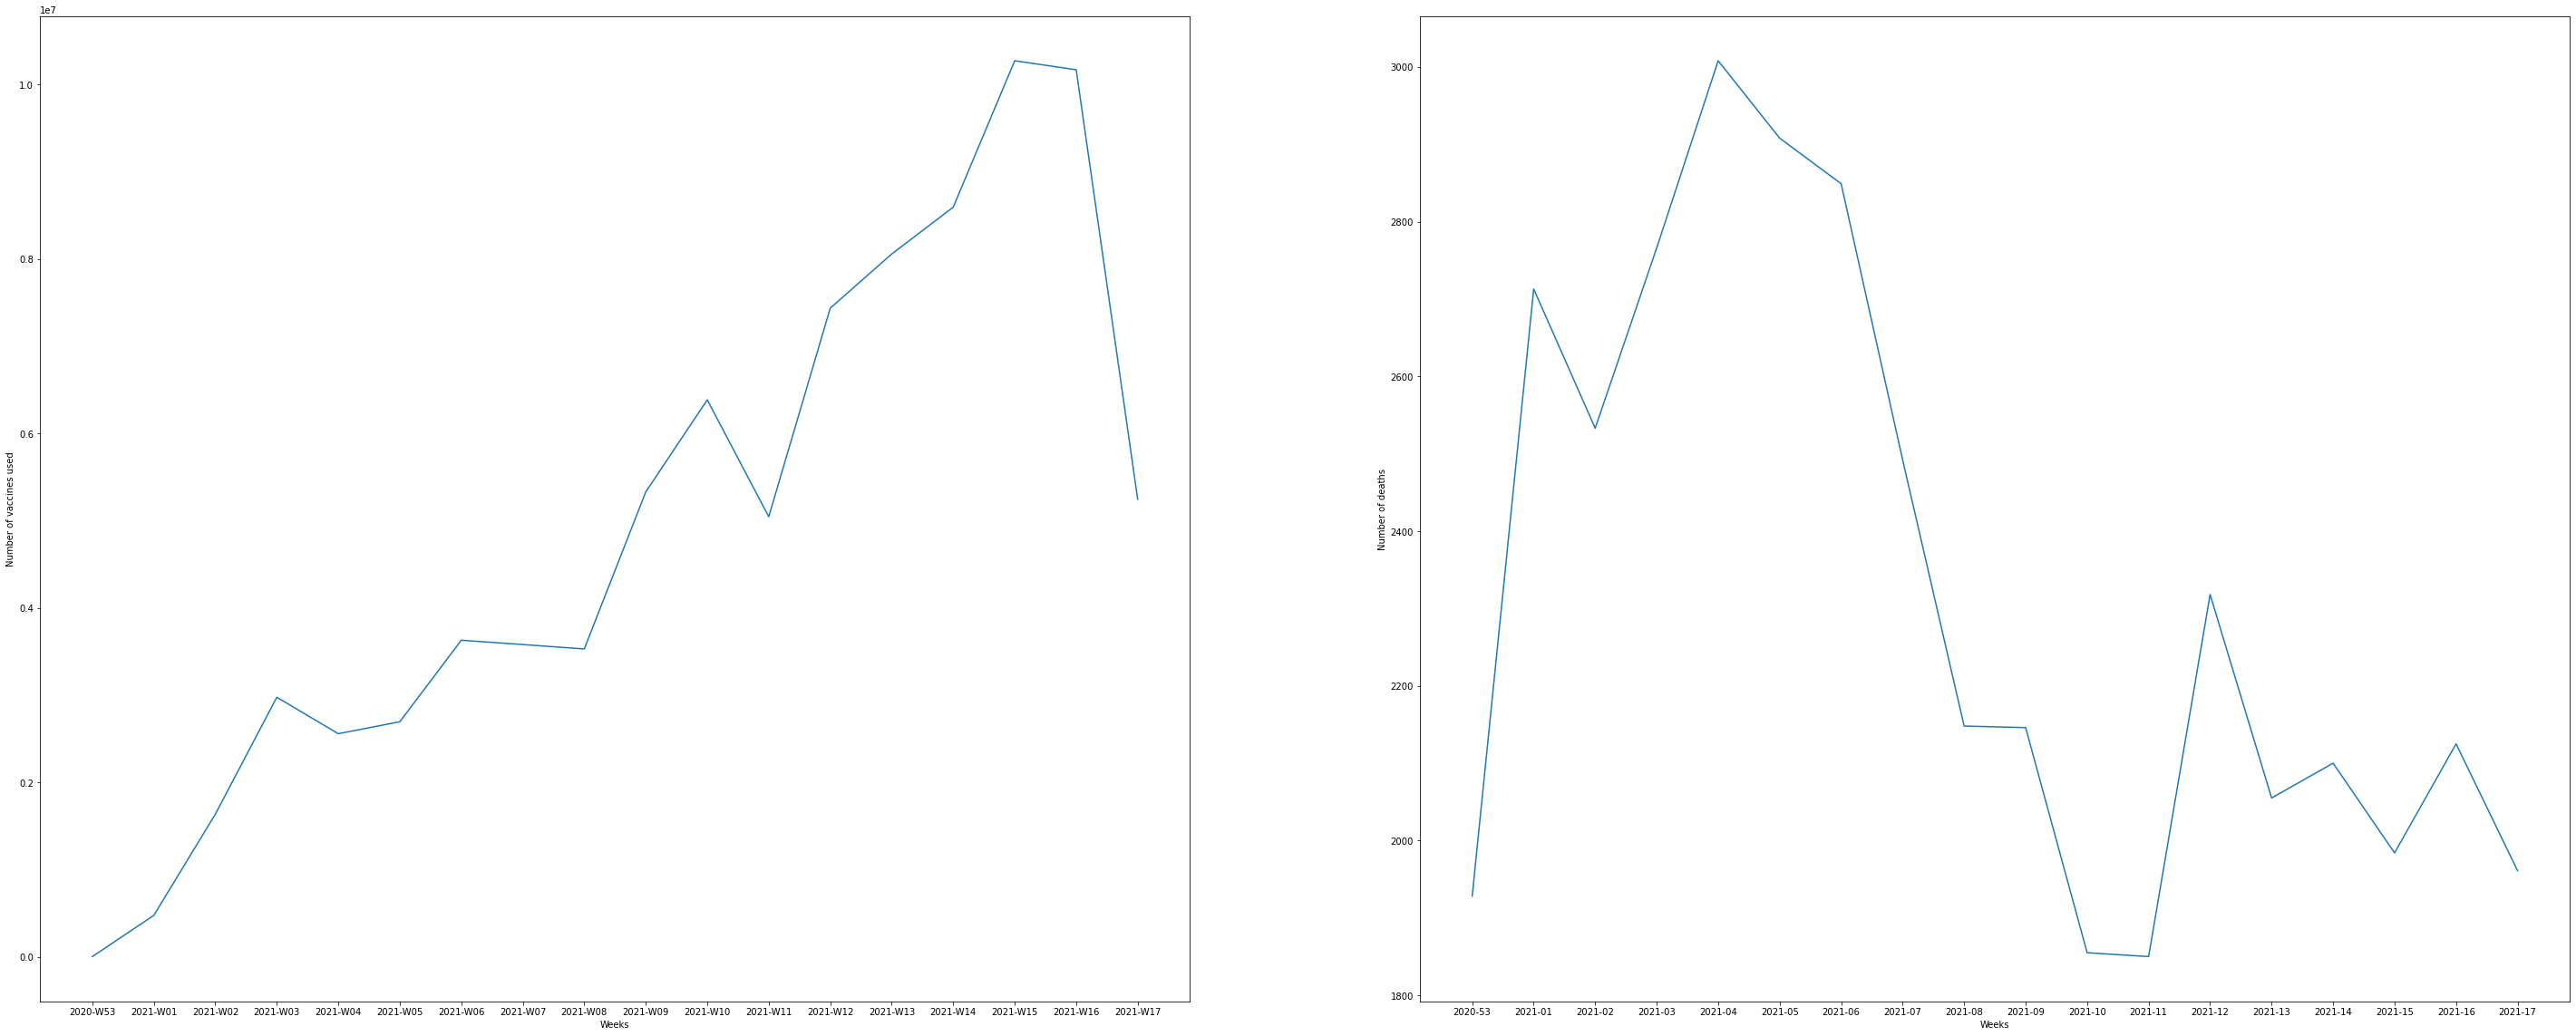

In [39]:
plt.figure(figsize=(50, 20))
plt.subplot(1, 2, 1)
plt.plot(data_vaccine_fr2.index, data_vaccine_fr2.values)
plt.xlabel("Weeks")
plt.ylabel("Number of vaccines used")
plt.subplot(1, 2, 2)
plt.plot(data_fr.year_week.values, data_fr.weekly_count.values)
plt.xlabel("Weeks")
plt.ylabel("Number of deaths")

.


The amount of use of weekly vaccines


.

First Dose

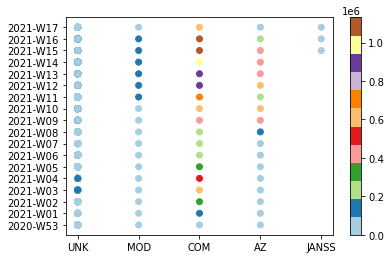

In [40]:
colors = data_vaccine_fr1.FirstDose
plt.scatter(data_vaccine_fr1.Vaccine, data_vaccine_fr1.YearWeekISO , c=colors, cmap='Paired')
plt.colorbar()
plt.show()

Second Dose

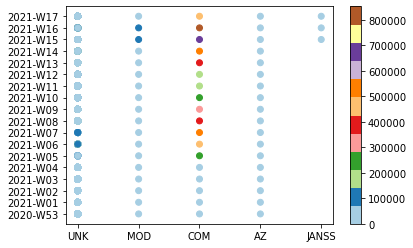

In [41]:
colors = data_vaccine_fr1.SecondDose
plt.scatter(data_vaccine_fr1.Vaccine, data_vaccine_fr1.YearWeekISO , c=colors, cmap='Paired')
plt.colorbar()
plt.show()

In [42]:
data_new_FR = pd.DataFrame()
data_new_FR["NumOfDeaths"] = data_fr.weekly_count.values
data_new_FR["NumOfVaccinated"] = data_vaccine_fr2.values
data_new_FR

,NumOfDeaths,NumOfVaccinated
0,1928,2806
1,2713,475312
2,2533,1634810
3,2766,2975129
4,3008,2557369
5,2908,2694250
6,2849,3628759
7,2492,3579305
8,2148,3528698
9,2146,5328635


In [43]:
data_new_FR.describe()

,NumOfDeaths,NumOfVaccinated
count,18.000000,1.800000e+01
mean,2318.833333,4.866576e+06
std,389.290644,3.092991e+06
min,1850.000000,2.806000e+03
25%,2001.750000,2.764470e+06
50%,2147.000000,4.336608e+06
75%,2668.000000,7.171877e+06
max,3008.000000,1.027063e+07


In [44]:
data_new_FR.corr()

,NumOfDeaths,NumOfVaccinated
NumOfDeaths,1.000000,-0.507484
NumOfVaccinated,-0.507484,1.000000


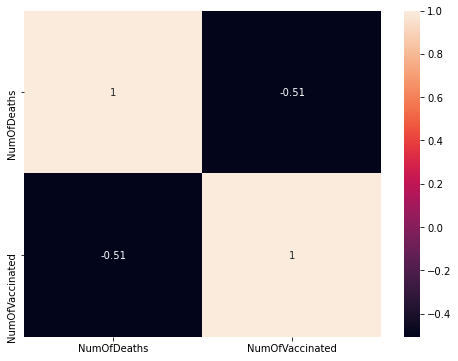

In [45]:
plt.figure(figsize = (8,6))
sns.heatmap(data_new_FR.corr(), annot = True)
plt.show()

The number of deaths decreases as the number of vaccinated people increases

In [46]:
print(stats.ttest_ind(data_new_FR.NumOfVaccinated.values, data_new_FR.NumOfDeaths.values, equal_var=True))

Ttest_indResult(statistic=6.672278432071443, pvalue=1.169421133892593e-07)


In [47]:
stats.shapiro(data_new_FR)

ShapiroResult(statistic=0.7610301971435547, pvalue=2.992211420860258e-06)

# Prediction

I estimated the number of cases in the future

In [48]:
data_cases = pd.read_csv('json.csv')
data_cases2 = data_cases[data_cases["indicator"]=="cases"]
data_cases2

,country,country_code,continent,population,indicator,weekly_count,year_week,cumulative_count,source,rate_14_day
0,Afghanistan,AFG,Asia,38928341.0,cases,0,2020-01,0,"Epidemic intelligence, national weekly data",NaN
1,Afghanistan,AFG,Asia,38928341.0,cases,0,2020-02,0,"Epidemic intelligence, national weekly data",0.000000
2,Afghanistan,AFG,Asia,38928341.0,cases,0,2020-03,0,"Epidemic intelligence, national weekly data",0.000000
3,Afghanistan,AFG,Asia,38928341.0,cases,0,2020-04,0,"Epidemic intelligence, national weekly data",0.000000
4,Afghanistan,AFG,Asia,38928341.0,cases,0,2020-05,0,"Epidemic intelligence, national weekly data",0.000000
...,...,...,...,...,...,...,...,...,...,...
28084,Zimbabwe,ZWE,Africa,14862927.0,cases,463,2021-15,37751,"Epidemic intelligence, national weekly data",5.570908
28085,Zimbabwe,ZWE,Africa,14862927.0,cases,335,2021-16,38086,"Epidemic intelligence, national weekly data",5.369064
28086,Zimbabwe,ZWE,Africa,14862927.0,cases,195,2021-17,38281,"Epidemic intelligence, national weekly data",3.565919
28087,Zimbabwe,ZWE,Africa,14862927.0,cases,138,2021-18,38419,"Epidemic intelligence, national weekly data",2.240474


In [49]:
data_cases2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14075 entries, 0 to 28088
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14075 non-null  object 
 1   country_code      13634 non-null  object 
 2   continent         14066 non-null  object 
 3   population        14066 non-null  float64
 4   indicator         14075 non-null  object 
 5   weekly_count      14075 non-null  int64  
 6   year_week         14075 non-null  object 
 7   cumulative_count  14075 non-null  int64  
 8   source            14075 non-null  object 
 9   rate_14_day       13846 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1.2+ MB


In [50]:
data_cases2.describe()

,population,weekly_count,cumulative_count,rate_14_day
count,1.406600e+04,1.407500e+04,1.407500e+04,13846.000000
mean,7.885628e+07,2.556695e+04,5.477329e+05,105.825277
std,3.679201e+08,1.507255e+05,3.398019e+06,224.659505
min,8.090000e+02,-2.830400e+04,0.000000e+00,-130.009519
25%,1.271767e+06,1.500000e+01,3.945000e+02,1.361209
50%,8.278737e+06,3.070000e+02,6.377000e+03,12.741721
75%,3.125544e+07,4.080000e+03,8.680500e+04,104.542199
max,4.498460e+09,3.344360e+06,6.543192e+07,4345.374136


# For TURKEY

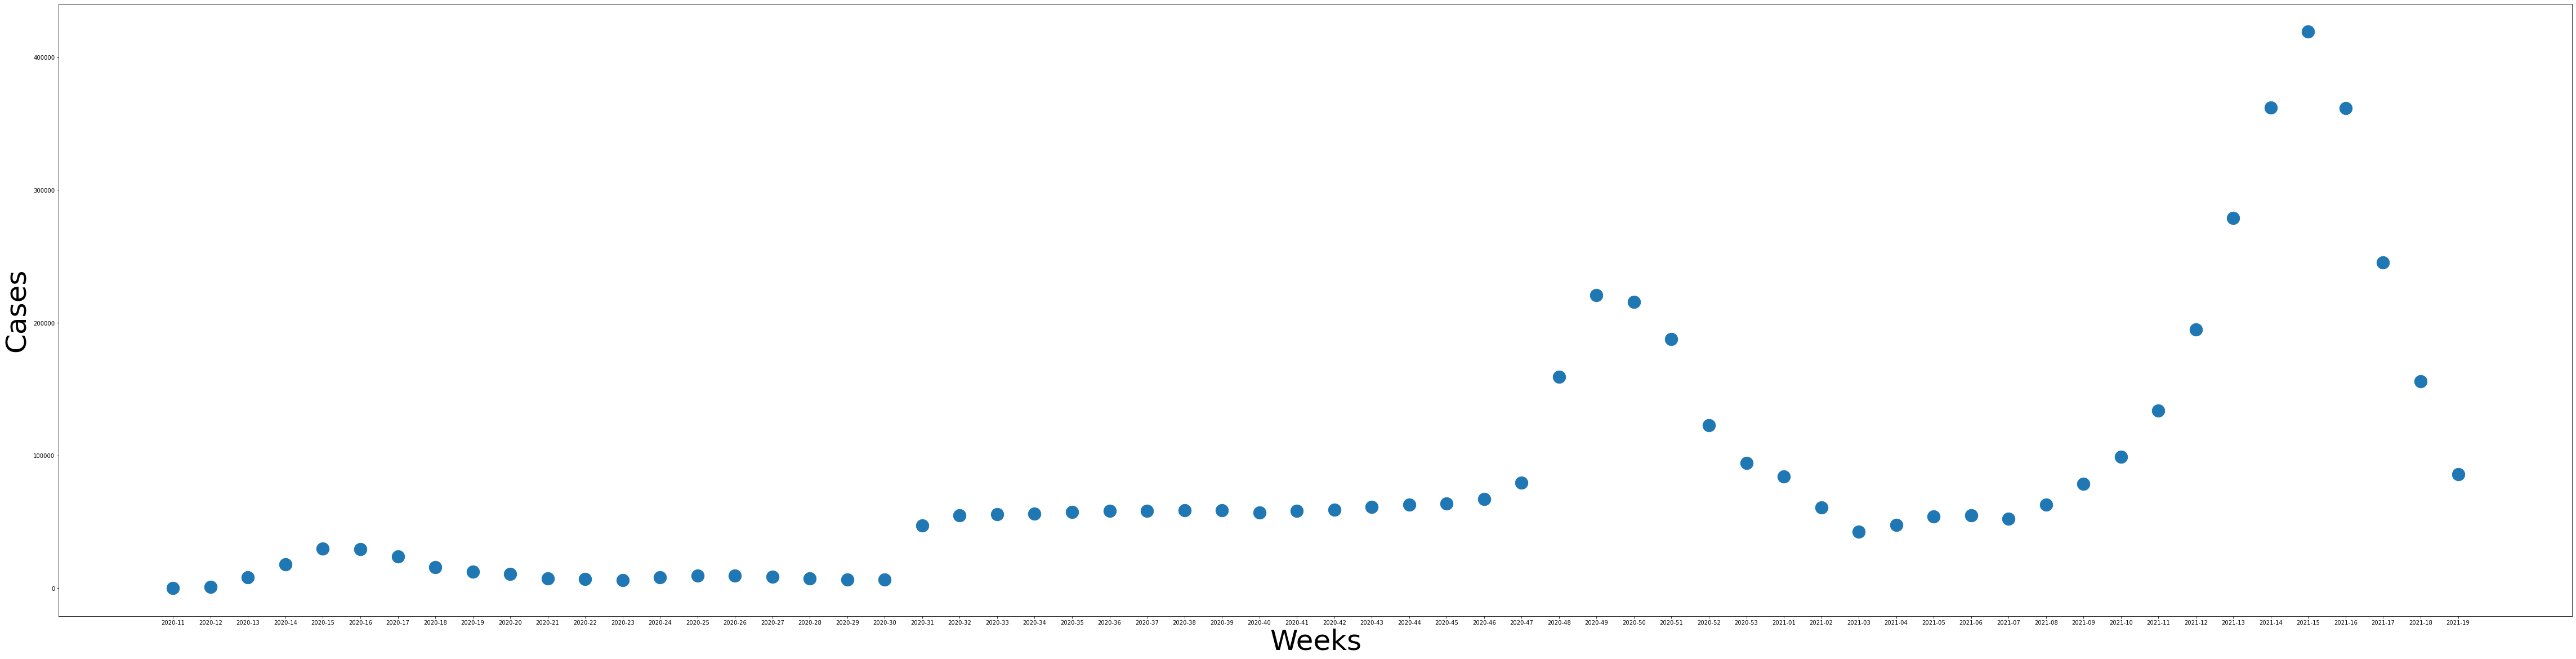

,country,country_code,continent,population,indicator,weekly_count,year_week,cumulative_count,source,rate_14_day
25882,Turkey,TUR,Europe,83154997.0,cases,18,2020-11,18,"Epidemic intelligence, national weekly data",NaN
25883,Turkey,TUR,Europe,83154997.0,cases,1218,2020-12,1236,"Epidemic intelligence, national weekly data",1.486381
25884,Turkey,TUR,Europe,83154997.0,cases,8035,2020-13,9271,"Epidemic intelligence, national weekly data",11.127413
25885,Turkey,TUR,Europe,83154997.0,cases,17798,2020-14,27069,"Epidemic intelligence, national weekly data",31.066083
25886,Turkey,TUR,Europe,83154997.0,cases,29887,2020-15,56956,"Epidemic intelligence, national weekly data",57.344720
...,...,...,...,...,...,...,...,...,...,...
25939,Turkey,TUR,Europe,83154997.0,cases,419436,2021-15,4268447,"Epidemic intelligence, national weekly data",939.687365
25940,Turkey,TUR,Europe,83154997.0,cases,361522,2021-16,4629969,"Epidemic intelligence, national weekly data",939.159435
25941,Turkey,TUR,Europe,83154997.0,cases,245419,2021-17,4875388,"Epidemic intelligence, national weekly data",729.891193
25942,Turkey,TUR,Europe,83154997.0,cases,155944,2021-18,5031332,"Epidemic intelligence, national weekly data",482.668528


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

turkey_data = data_cases2[data_cases2['country'] == 'Turkey']
y_turkey = np.array(turkey_data['weekly_count'])
X_turkey =  np.arange(62).reshape(-1,1)
X_turkey2 = turkey_data['year_week']


plt.figure(figsize=(80, 20))
plt.scatter(X_turkey2, y_turkey, s=500)
plt.ylabel('Cases',fontsize=50)
plt.xlabel('Weeks', fontsize=50)
plt.show()
turkey_data

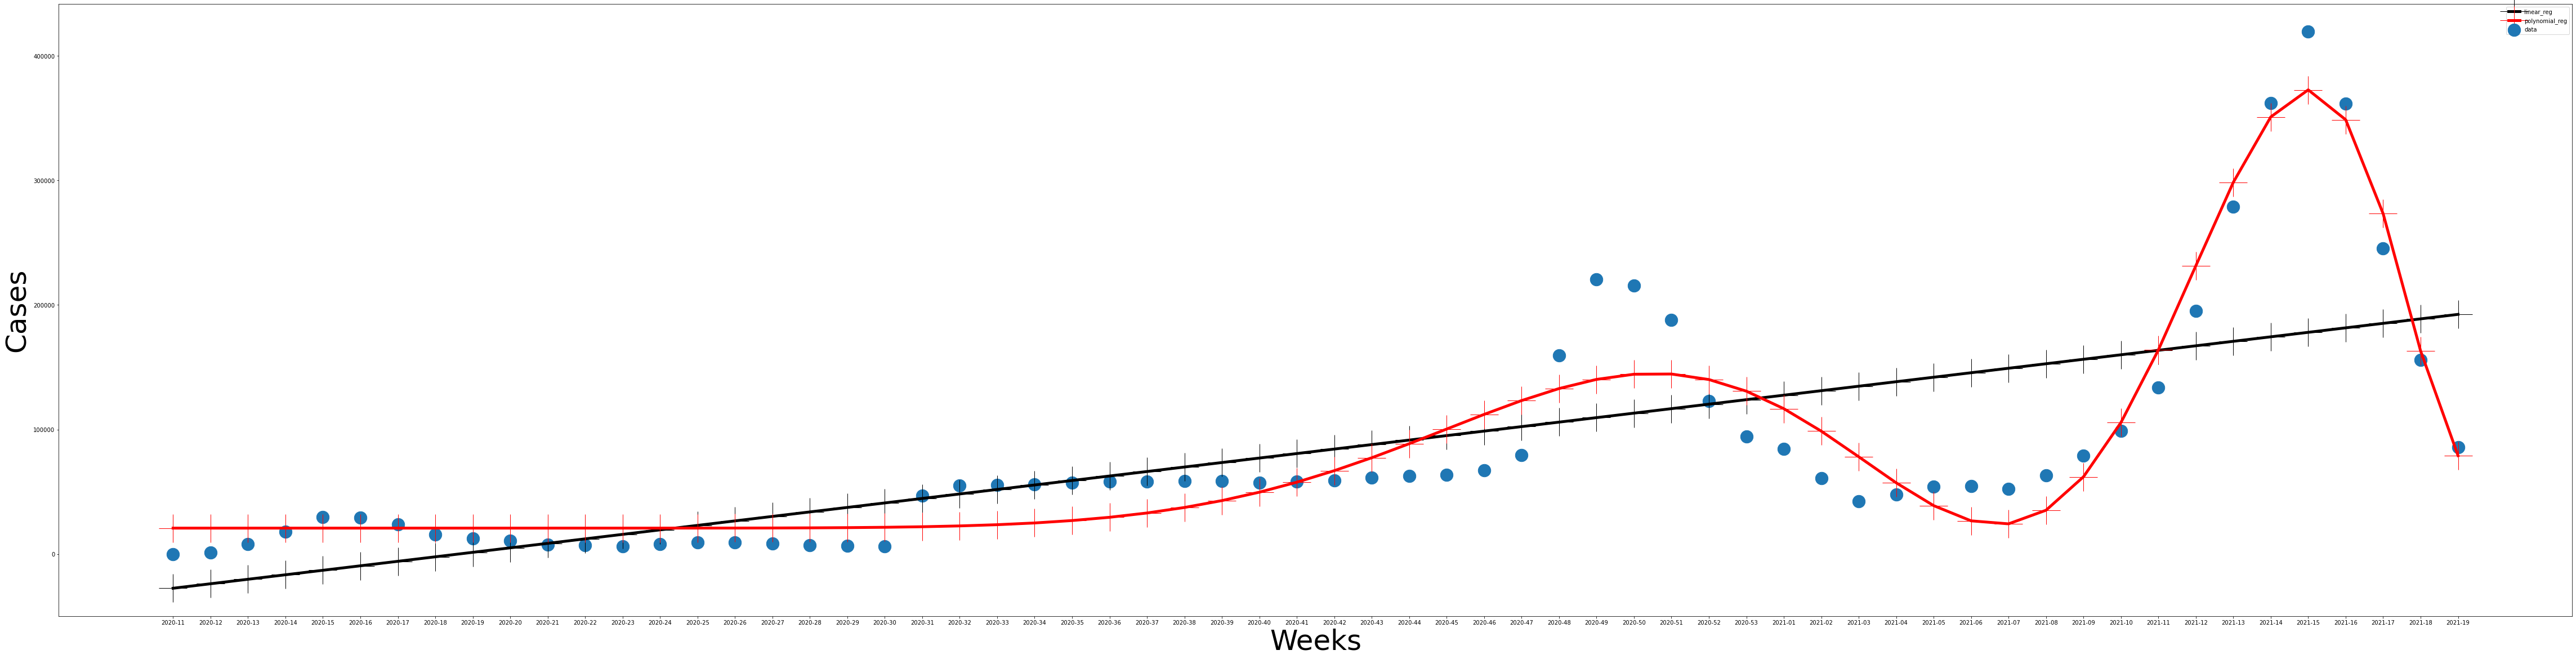

In [52]:
#Linear Regression Model Fitting
lin_reg_turkey = LinearRegression()
lin_reg_turkey.fit(X_turkey, y_turkey)
#Polynomial Regression Model Fitting
poly_reg_turkey = PolynomialFeatures(degree=17)
X_poly_turkey = poly_reg_turkey.fit_transform(X_turkey)
pol_reg_turkey = LinearRegression()
pol_reg_turkey.fit(X_poly_turkey, y_turkey)
linear_pred_turkey = lin_reg_turkey.predict(X_turkey)
poly_pred_turkey = pol_reg_turkey.predict(poly_reg_turkey.fit_transform(X_turkey))

plt.figure(figsize=(80, 20))
plt.scatter(X_turkey2, y_turkey, s=500)
plt.plot(X_turkey, linear_pred_turkey, '+-', color='black', linewidth=5, markersize=50)
plt.plot(X_turkey2, poly_pred_turkey, '+-', color='red', linewidth=5, markersize=50)
plt.ylabel('Cases',fontsize=50)
plt.xlabel('Weeks', fontsize=50)
plt.legend(['linear_reg', 'polynomial_reg', 'data'])
plt.show()

In [53]:
print('Score:', mean_squared_error(y_turkey, poly_pred_turkey))
print('Polynomial Model Fit Score:', pol_reg_turkey.score(X_poly_turkey, y_turkey))
print('Score:', mean_squared_error(y_turkey, linear_pred_turkey))
print('Linear Model Fit Score:', lin_reg_turkey.score(X_turkey, y_turkey))

Score: 720825340.7511792
Polynomial Model Fit Score: 0.9156033098848763
Score: 4382328405.751519
Linear Model Fit Score: 0.48690203918540564


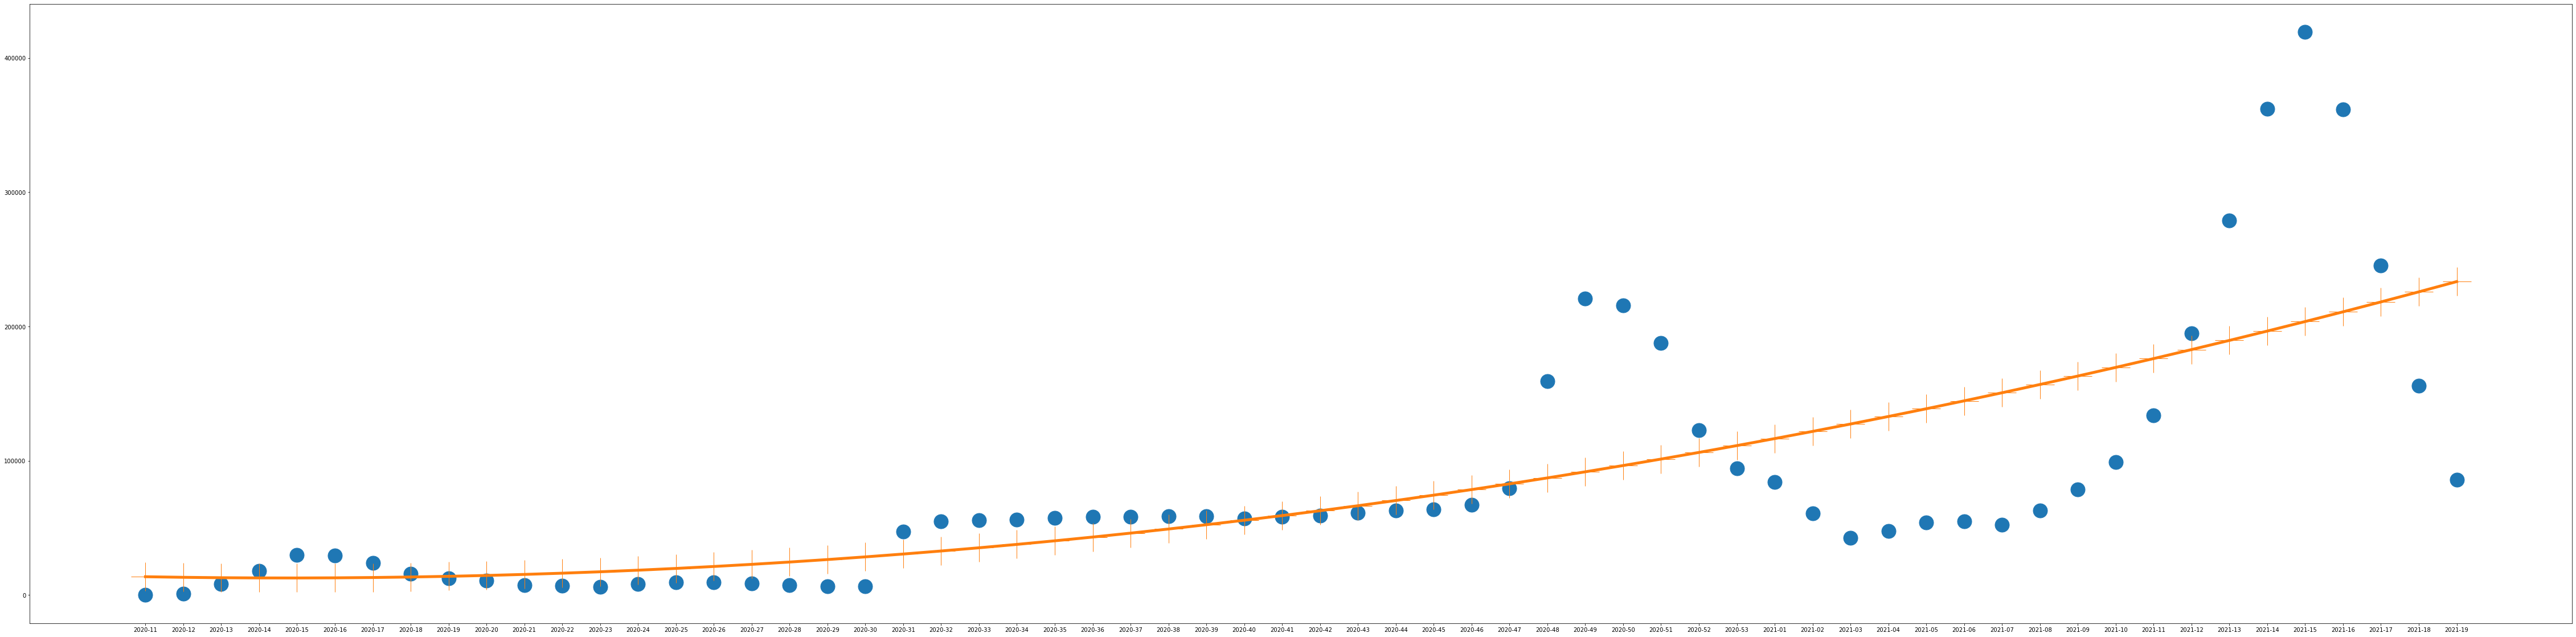

In [54]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
lin_reg = LinearRegression()
X_poly = poly_features.fit_transform(X_turkey)
lin_reg.fit(X_poly, y_turkey)
lin_reg.intercept_, lin_reg.coef_
y_test = lin_reg.predict(X_poly)

plt.figure(figsize=(80, 20))
plt.plot(X_turkey2, y_turkey,'.', linewidth=5, markersize=50)
plt.plot(X_turkey2,y_test,'+-', linewidth=5, markersize=50)

.


With pipeline

.

[ 0.00000000e+00  7.16091145e-21 -3.78766099e-23 -2.24542999e-26
 -1.28480905e-28  1.20037571e-30  6.89404103e-29  2.17512658e-27
  6.59904444e-26  1.90794397e-24  5.18725047e-23  1.30009047e-21
  2.91236087e-20  5.53331368e-19  8.04649397e-18  6.84057904e-17
 -6.08159665e-18  2.14421363e-19 -3.75965139e-21  3.28076042e-23
 -1.14020979e-25]


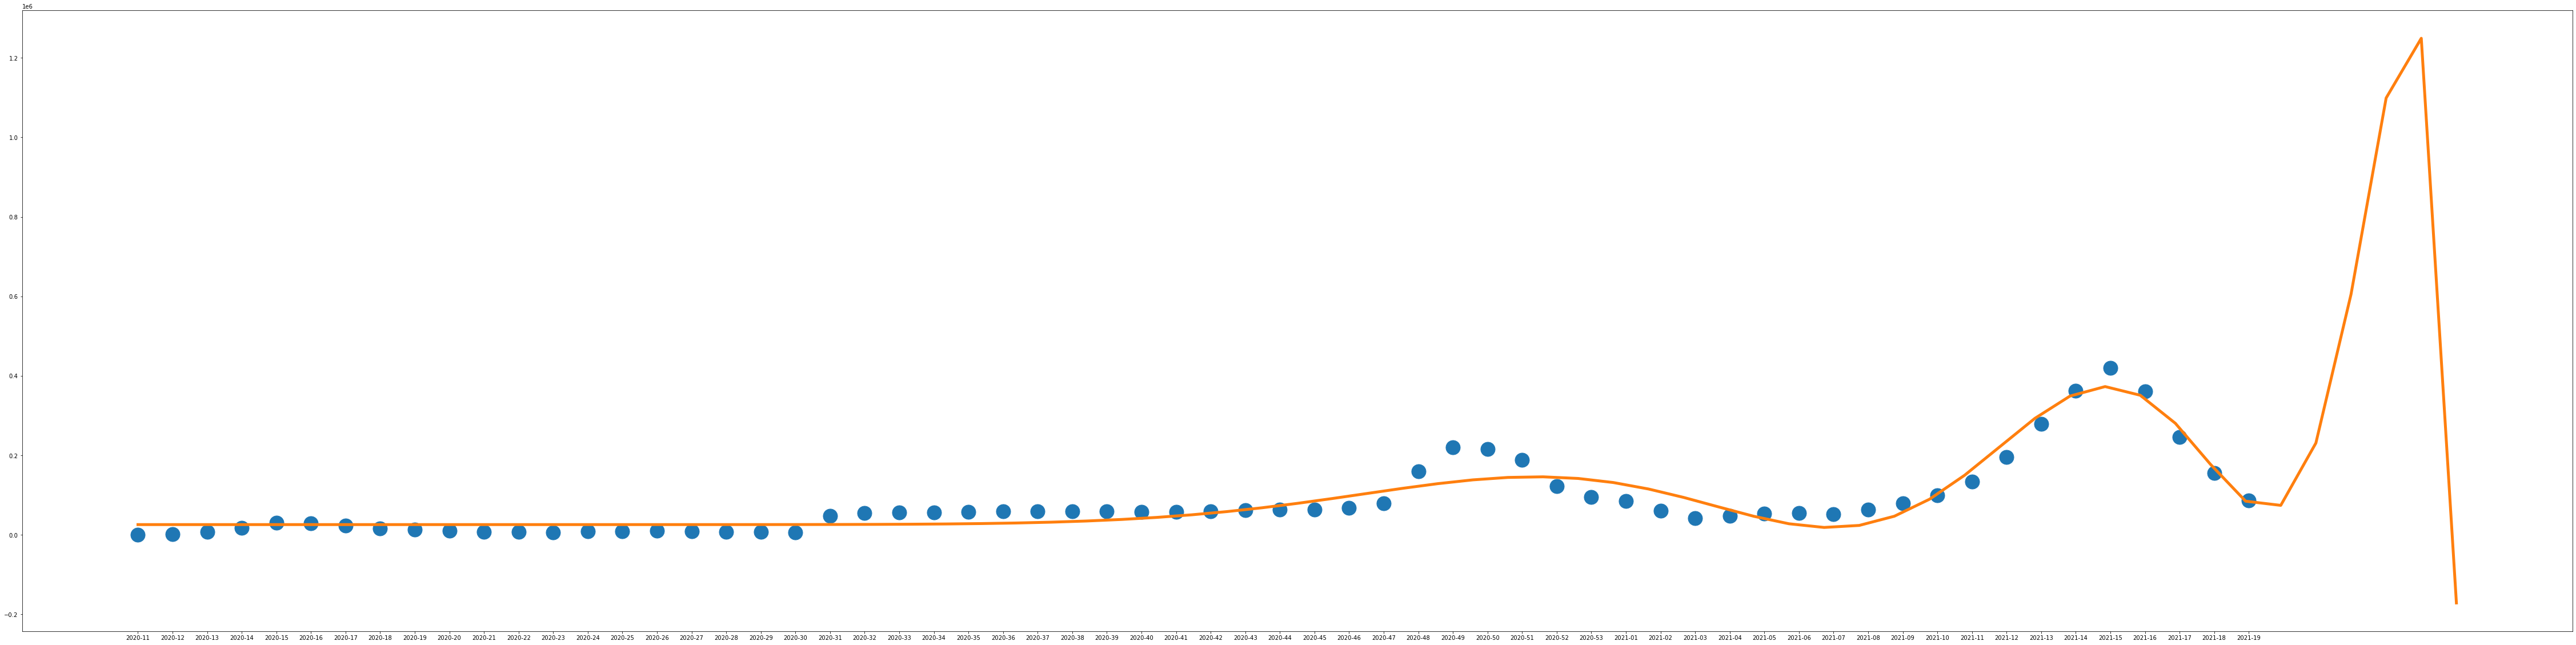

In [75]:
from sklearn.pipeline import make_pipeline
X_testt =  np.linspace(0,67,67).reshape(-1,1)
poly_model = make_pipeline(PolynomialFeatures(20),LinearRegression())
poly_model.fit(X_turkey,y_turkey)
yfit = poly_model.predict(X_testt)

plt.figure(figsize=(80, 20))
plt.plot(X_turkey2, y_turkey,'.', markersize=50)
plt.plot(X_testt, yfit, linewidth=5, markersize=50);

print(poly_model.named_steps['linearregression'].coef_)

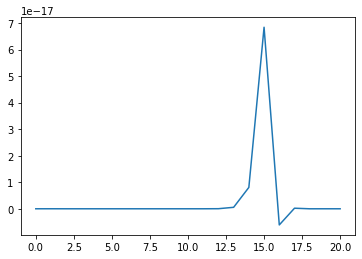

In [76]:
plt.plot(poly_model.named_steps['linearregression'].coef_)

In [77]:
print('Polynomial Regression Turkey Corona-weekly-cases Predictions')
print('2021-20: ', yfit[62])
print('2021-21: ', yfit[63])
print('2021-22: ', yfit[64])
print('2021-22: ', yfit[65])

Polynomial Regression Turkey Corona-weekly-cases Predictions
2021-20:  230916.06745652232
2021-21:  604941.3654301551
2021-22:  1098963.849805155
2021-22:  1249175.008740702


# For GERMANY

,country,country_code,continent,population,indicator,weekly_count,year_week,cumulative_count,source,rate_14_day
10296,Germany,DEU,Europe,83166711.0,cases,0,2020-01,0,"Epidemic intelligence, national weekly data",NaN
10297,Germany,DEU,Europe,83166711.0,cases,0,2020-02,0,"Epidemic intelligence, national weekly data",0.000000
10298,Germany,DEU,Europe,83166711.0,cases,0,2020-03,0,"Epidemic intelligence, national weekly data",0.000000
10299,Germany,DEU,Europe,83166711.0,cases,0,2020-04,0,"Epidemic intelligence, national weekly data",0.000000
10300,Germany,DEU,Europe,83166711.0,cases,9,2020-05,9,"Epidemic intelligence, national weekly data",0.010822
...,...,...,...,...,...,...,...,...,...,...
10363,Germany,DEU,Europe,83166711.0,cases,142186,2021-15,3153699,"Epidemic intelligence, national weekly data",312.403841
10364,Germany,DEU,Europe,83166711.0,cases,145626,2021-16,3299325,"Epidemic intelligence, national weekly data",346.066349
10365,Germany,DEU,Europe,83166711.0,cases,126657,2021-17,3425982,"Epidemic intelligence, national weekly data",327.394214
10366,Germany,DEU,Europe,83166711.0,cases,101269,2021-18,3527251,"Epidemic intelligence, national weekly data",274.059173


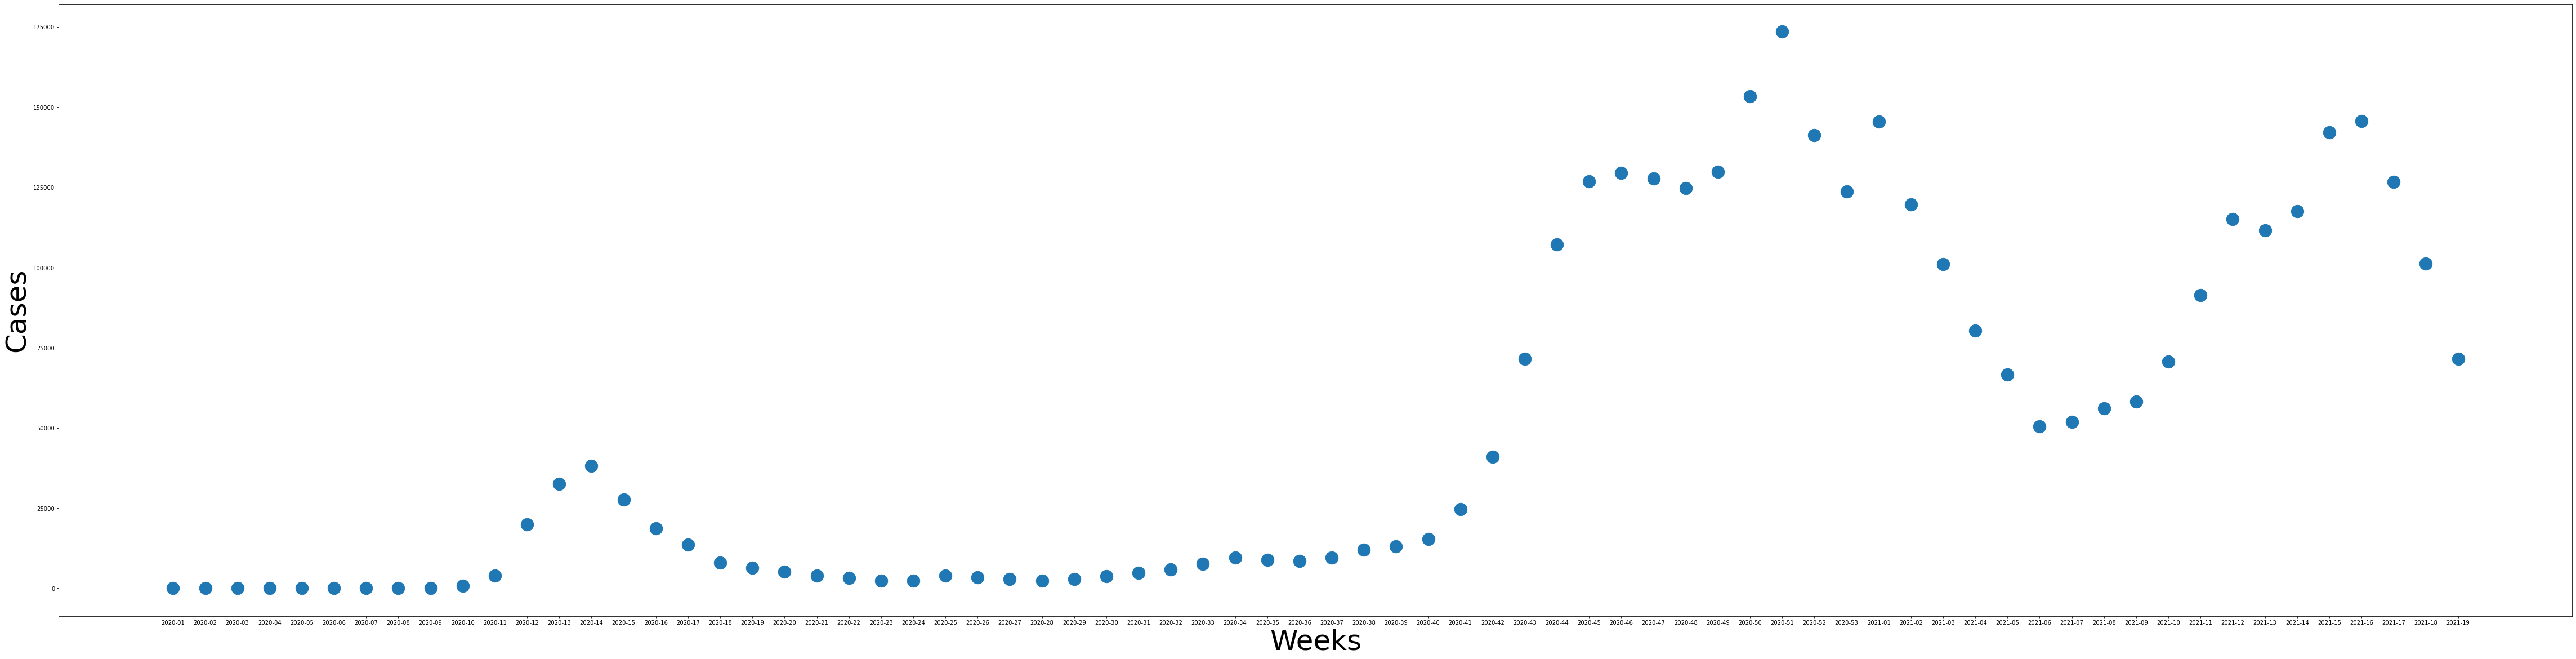

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

germany_data = data_cases2[data_cases2['country'] == 'Germany']
y_germany = np.array(germany_data['weekly_count'])
X_germany =  np.arange(72).reshape(-1,1)
X_germany2 = germany_data['year_week']


plt.figure(figsize=(80, 20))
plt.scatter(X_germany2, y_germany, s=500)
plt.ylabel('Cases',fontsize=50)
plt.xlabel('Weeks', fontsize=50)
germany_data

In [59]:
germany_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 10296 to 10367
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           72 non-null     object 
 1   country_code      72 non-null     object 
 2   continent         72 non-null     object 
 3   population        72 non-null     float64
 4   indicator         72 non-null     object 
 5   weekly_count      72 non-null     int64  
 6   year_week         72 non-null     object 
 7   cumulative_count  72 non-null     int64  
 8   source            72 non-null     object 
 9   rate_14_day       71 non-null     float64
dtypes: float64(2), int64(2), object(6)
memory usage: 6.2+ KB


In [60]:
germany_data.describe()

,population,weekly_count,cumulative_count,rate_14_day
count,72.0,72.000000,7.200000e+01,71.000000
mean,83166711.0,49983.972222,9.631430e+05,120.682377
std,0.0,54254.575498,1.141281e+06,129.972024
min,83166711.0,0.000000,0.000000e+00,0.000000
25%,83166711.0,3851.250000,1.679750e+05,8.668132
50%,83166711.0,19296.000000,2.555770e+05,48.094964
75%,83166711.0,102742.000000,1.950933e+06,256.752368
max,83166711.0,173574.000000,3.598846e+06,393.183758


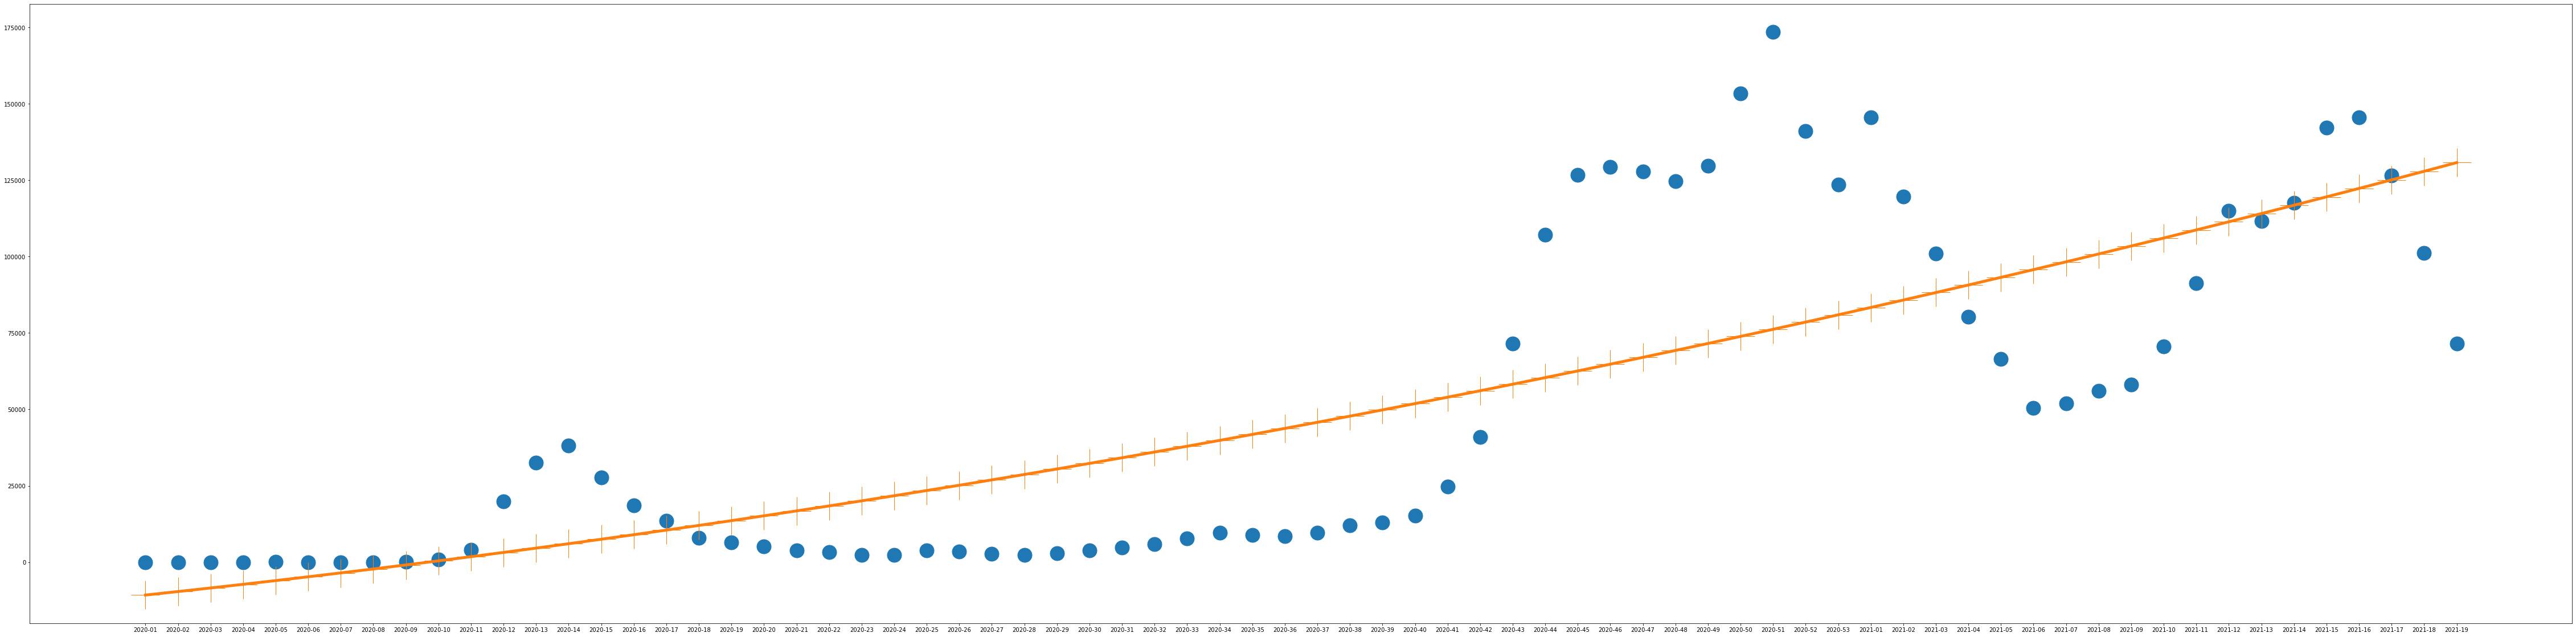

In [61]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
lin_reg = LinearRegression()
X_poly = poly_features.fit_transform(X_germany)
lin_reg.fit(X_poly, y_germany)
lin_reg.intercept_, lin_reg.coef_
y_test = lin_reg.predict(X_poly)

plt.figure(figsize=(80, 20))
plt.plot(X_germany2, y_germany,'.', linewidth=5, markersize=50)
plt.plot(X_germany2,y_test,'+-', linewidth=5, markersize=50)

.

With pipeline



.

[ 0.00000000e+00  1.07169822e-20 -1.35899155e-23 -1.92597185e-26
 -1.85980314e-29  1.24174333e-31  1.10047650e-30  4.04303784e-29
  1.42789587e-27  4.80591701e-26  1.52106934e-24  4.43809859e-23
  1.15744026e-21  2.56038432e-20  4.33593596e-19  4.29618145e-18
 -3.18055466e-19  9.37031053e-21 -1.37622014e-22  1.00805359e-24
 -2.94640063e-27]


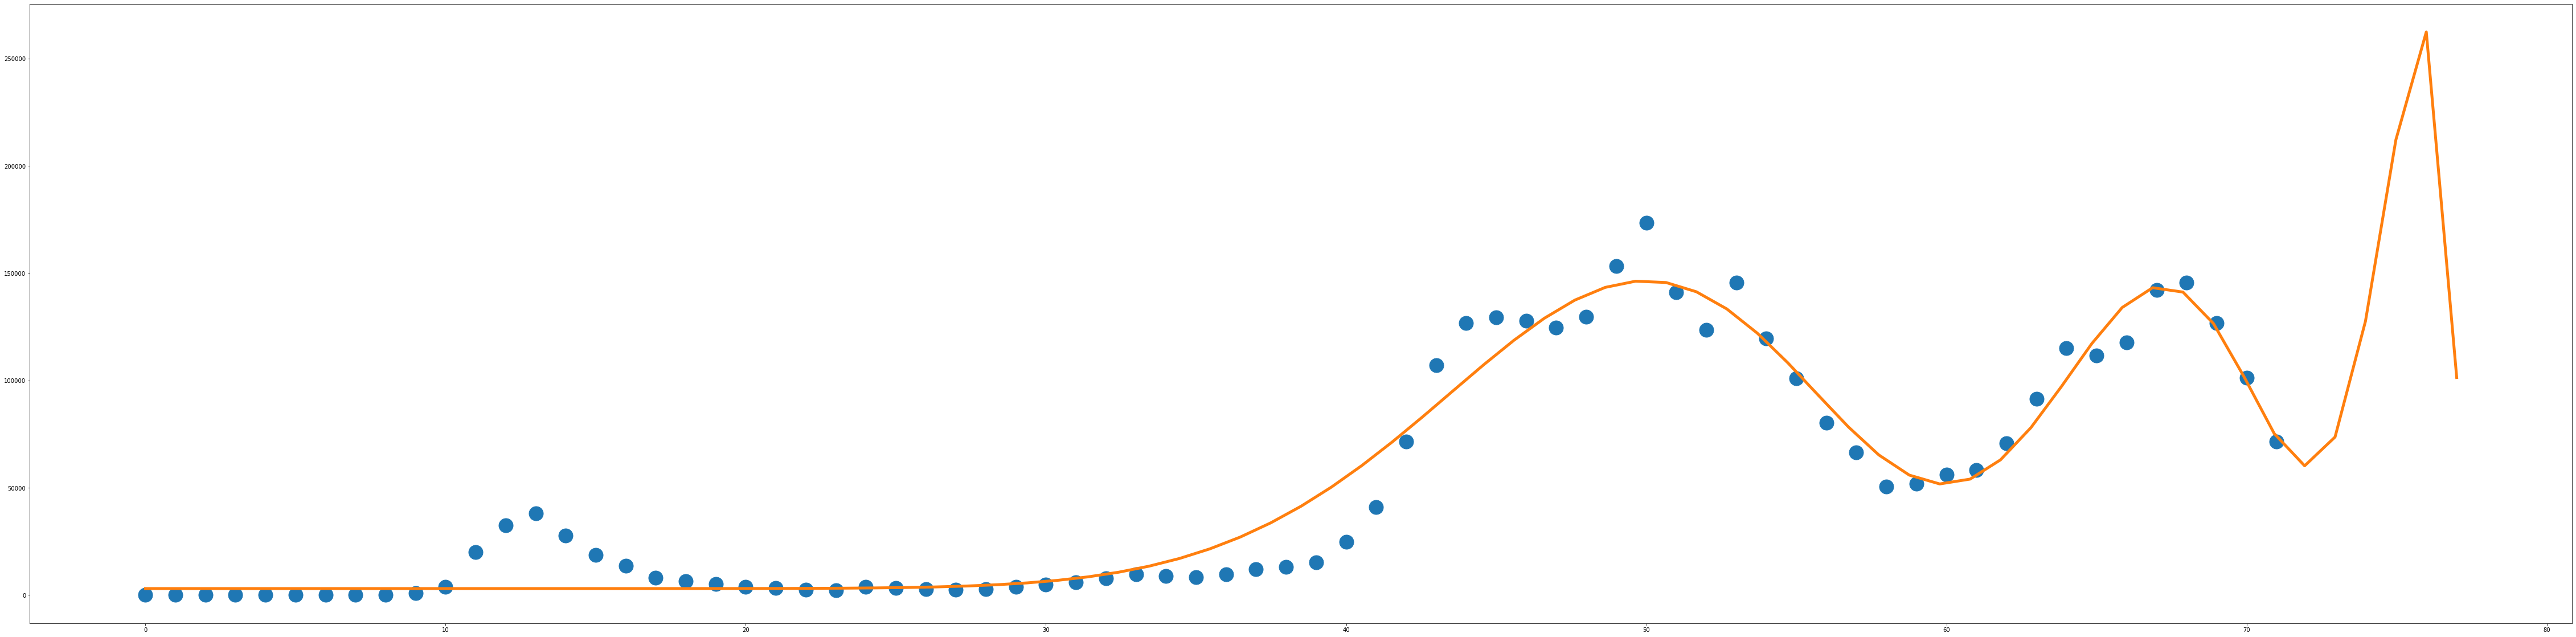

In [62]:
from sklearn.pipeline import make_pipeline
X_testt =  np.linspace(0,77,77).reshape(-1,1)
poly_model = make_pipeline(PolynomialFeatures(20),LinearRegression())
poly_model.fit(X_germany,y_germany)
yfit = poly_model.predict(X_testt)

plt.figure(figsize=(80, 20))
plt.plot(X_germany, y_germany,'.', markersize=50)
plt.plot(X_testt, yfit, linewidth=5, markersize=50);

print(poly_model.named_steps['linearregression'].coef_)

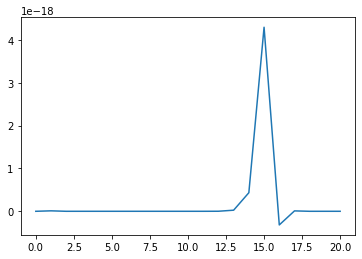

In [63]:
plt.plot(poly_model.named_steps['linearregression'].coef_)

In [64]:
print('Polynomial Regression Germany Corona-weekly-cases Predictions')
print('2021-20: ', yfit[73])
print('2021-21: ', yfit[74])
print('2021-22: ', yfit[75])
print('2021-23: ', yfit[76])

Polynomial Regression Germany Corona-weekly-cases Predictions
2021-20:  127605.32377327813
2021-21:  212139.935833825
2021-22:  262417.4891785516
2021-23:  101357.91544808281


# Conclusion

- We found that as vaccination increases, the number of deaths decreases
- We found that which vaccines are used in which country and how much.
- We fount that how many people each vaccine has been given in total.
- We found that how many people each vaccine has been given in total.
- We found that how much of vaccine used by countries with a high death rate.
- We  estimate the number of cases in the future

- https://www.kaggle.com/josephassaker/covid19-global-dataset?select=worldometer_coronavirus_daily_data.csv
- https://www.kaggle.com/arashnic/data-on-covid19-vaccination-in-the-eueea
- https://www.kaggle.com/hgultekin/covid19-coronavirus-data-weekly

# Extra

In [65]:
data_deaths_rate = data_corona
data_deaths_rate2 = data_deaths_rate[(data_deaths_rate["country"]=="Turkey")
| (data_deaths_rate["country"]=="Germany") 
| (data_deaths_rate["country"]=="Turkey")
| (data_deaths_rate["country"]=="USA")
| (data_deaths_rate["country"]=="France")
| (data_deaths_rate["country"]=="Italy")
]
data_deaths_rate2

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,corona_population,case_over_death
71,France,Europe,5747214,106101.0,4817288,823825,5106.0,87883,1622.0,78205751.0,1195877.0,65396123,0.087883,54.167388
77,Germany,Europe,3504012,85056.0,3147100,271856,5049.0,41709,1012.0,56836969.0,676540.0,84011297,0.041709,41.196529
100,Italy,Europe,4092747,122470.0,3572713,397564,2253.0,67776,2028.0,60532582.0,1002423.0,60386272,0.067776,33.418364
203,Turkey,Asia,4998089,42465.0,4662328,293296,3260.0,58727,499.0,48963800.0,575318.0,85107359,0.058727,117.699023
210,USA,North America,33418826,594911.0,26324757,6499158,9140.0,100463,1788.0,455989831.0,1370786.0,332648503,0.100463,56.174497


I created a data which has 5 country and they total deaths

In [66]:
data_deaths_rate3 = data_deaths_rate2[["country","total_deaths"]]
data_deaths_rate3

,country,total_deaths
71,France,106101.0
77,Germany,85056.0
100,Italy,122470.0
203,Turkey,42465.0
210,USA,594911.0


I divided the total deaths by 1000

In [67]:
data_deaths_rate3["total_deaths"] = data_deaths_rate3["total_deaths"]/1000
data_deaths_rate3

<ipython-input-67-86bbce87bea4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_deaths_rate3["total_deaths"] = data_deaths_rate3["total_deaths"]/1000


,country,total_deaths
71,France,106.101
77,Germany,85.056
100,Italy,122.470
203,Turkey,42.465
210,USA,594.911


I changed the name of USA to United States

In [68]:
data_deaths_rate3[4:].country = data_deaths_rate3[4:].country.replace("USA","United States")
data_deaths_rate3

D:\Anaconda3\envs\aienv\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,country,total_deaths
71,France,106.101
77,Germany,85.056
100,Italy,122.470
203,Turkey,42.465
210,United States,594.911


I plotted the death rates of countries

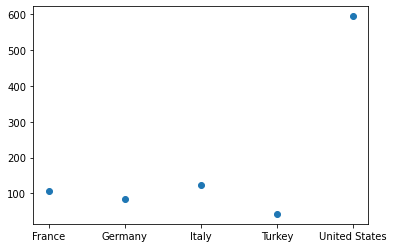

In [69]:
plt.scatter(data_deaths_rate3.country, data_deaths_rate3.total_deaths)

In [70]:
data_vaccine_number = pd.read_csv("country_vaccinations_by_manufacturer.csv")
data_vaccine_number

,location,date,vaccine,total_vaccinations
0,Chile,2020-12-24,Pfizer/BioNTech,420
1,Chile,2020-12-25,Pfizer/BioNTech,5198
2,Chile,2020-12-26,Pfizer/BioNTech,8338
3,Chile,2020-12-27,Pfizer/BioNTech,8649
4,Chile,2020-12-28,Pfizer/BioNTech,8649
...,...,...,...,...
3486,United States,2021-05-05,Moderna,108142826
3487,United States,2021-05-05,Pfizer/BioNTech,132721153
3488,United States,2021-05-06,Johnson&Johnson,8627243
3489,United States,2021-05-06,Moderna,109041458


In [71]:
data_vaccine_number2 = data_vaccine_number[
(data_vaccine_number["location"]=="Germany") & (data_vaccine_number["date"]=="2021-05-06")
| (data_vaccine_number["location"]=="United States") & (data_vaccine_number["date"]=="2021-05-06")
| (data_vaccine_number["location"]=="France") & (data_vaccine_number["date"]=="2021-05-05")
| (data_vaccine_number["location"]=="Italy") & (data_vaccine_number["date"]=="2021-05-06")
]
data_vaccine_number2

,location,date,vaccine,total_vaccinations
909,France,2021-05-05,Johnson&Johnson,79887
910,France,2021-05-05,Moderna,2001283
911,France,2021-05-05,Oxford/AstraZeneca,4015865
912,France,2021-05-05,Pfizer/BioNTech,17852954
1433,Germany,2021-05-06,Johnson&Johnson,15564
1434,Germany,2021-05-06,Moderna,2089638
1435,Germany,2021-05-06,Oxford/AstraZeneca,6540522
1436,Germany,2021-05-06,Pfizer/BioNTech,24919721
2305,Italy,2021-05-06,Johnson&Johnson,131708
2306,Italy,2021-05-06,Moderna,1756689


In [72]:
data_vaccine_number2["total_vaccinations"] = data_vaccine_number2.total_vaccinations/1000
data_vaccine_number2

<ipython-input-72-90136f82887c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vaccine_number2["total_vaccinations"] = data_vaccine_number2.total_vaccinations/1000


,location,date,vaccine,total_vaccinations
909,France,2021-05-05,Johnson&Johnson,79.887
910,France,2021-05-05,Moderna,2001.283
911,France,2021-05-05,Oxford/AstraZeneca,4015.865
912,France,2021-05-05,Pfizer/BioNTech,17852.954
1433,Germany,2021-05-06,Johnson&Johnson,15.564
1434,Germany,2021-05-06,Moderna,2089.638
1435,Germany,2021-05-06,Oxford/AstraZeneca,6540.522
1436,Germany,2021-05-06,Pfizer/BioNTech,24919.721
2305,Italy,2021-05-06,Johnson&Johnson,131.708
2306,Italy,2021-05-06,Moderna,1756.689


In [73]:
data_vaccine_number3 = data_vaccine_number2[["location", "vaccine", "total_vaccinations"]]
data_vaccine_number3 = data_vaccine_number3[data_vaccine_number3 ["vaccine"]=="Pfizer/BioNTech"]

I plotted the using vaccines of countries

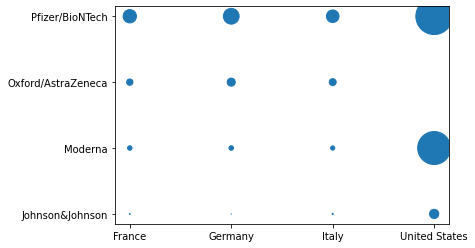

In [74]:
plt.scatter(data_vaccine_number2.location, data_vaccine_number2.vaccine, s=data_vaccine_number2.total_vaccinations/100)